In [1]:
"""
(1) Logistic Regression (Full Model)
(2) Logistic Regression (Reduced Model)
(3) Decision Tree
(4) Naive Bayes
(5) Linear Discriminant Analysis (LDA)
(6) Quadratic Discriminant Analysis (QDA)
(7) Support Vector Machine (SVM)
(8) K Nearest Neighbors (KNN)
(9) Kernel Logistic Regression
"""

'\n(1) Logistic Regression (Full Model)\n(2) Logistic Regression (Reduced Model)\n(3) Decision Tree\n(4) Naive Bayes\n(5) Linear Discriminant Analysis (LDA)\n(6) Quadratic Discriminant Analysis (QDA)\n(7) Support Vector Machine (SVM)\n(8) K Nearest Neighbors (KNN)\n(9) Kernel Logistic Regression\n'

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import minimize
from sklearn import tree
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score, mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.base import BaseEstimator, ClassifierMixin

In [3]:
# Import Data
df = pd.read_csv('Heart_Disease.csv')

In [4]:
# Display the first few rows of the Data Frame
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# Summary of the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Descriptive statistics for numerical columns
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

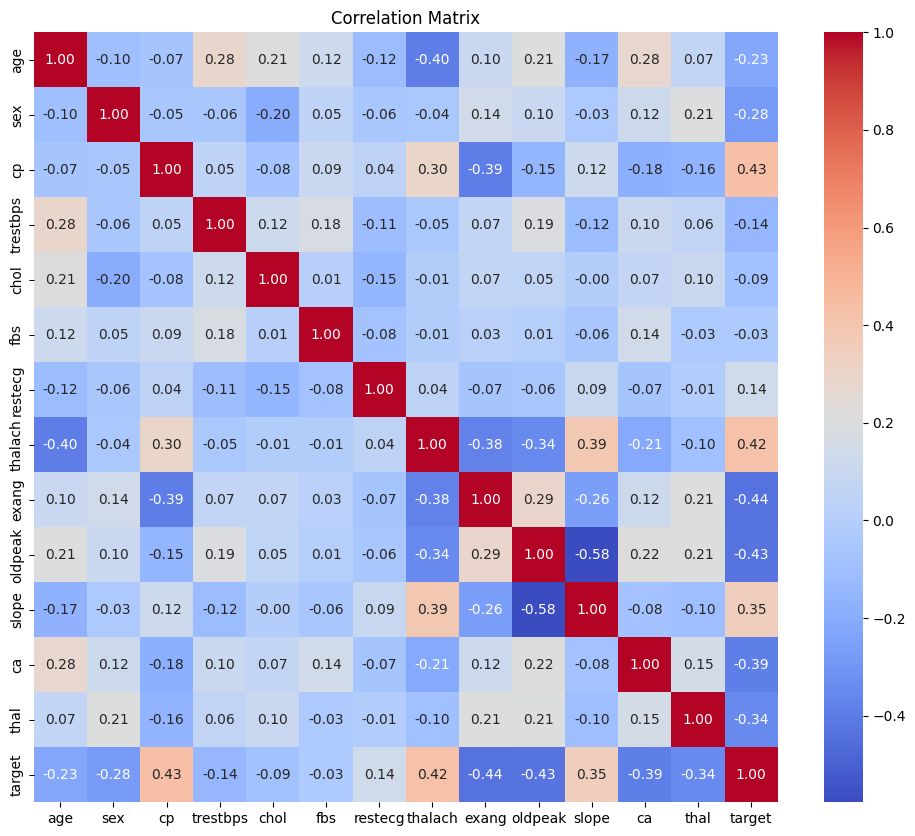

In [7]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

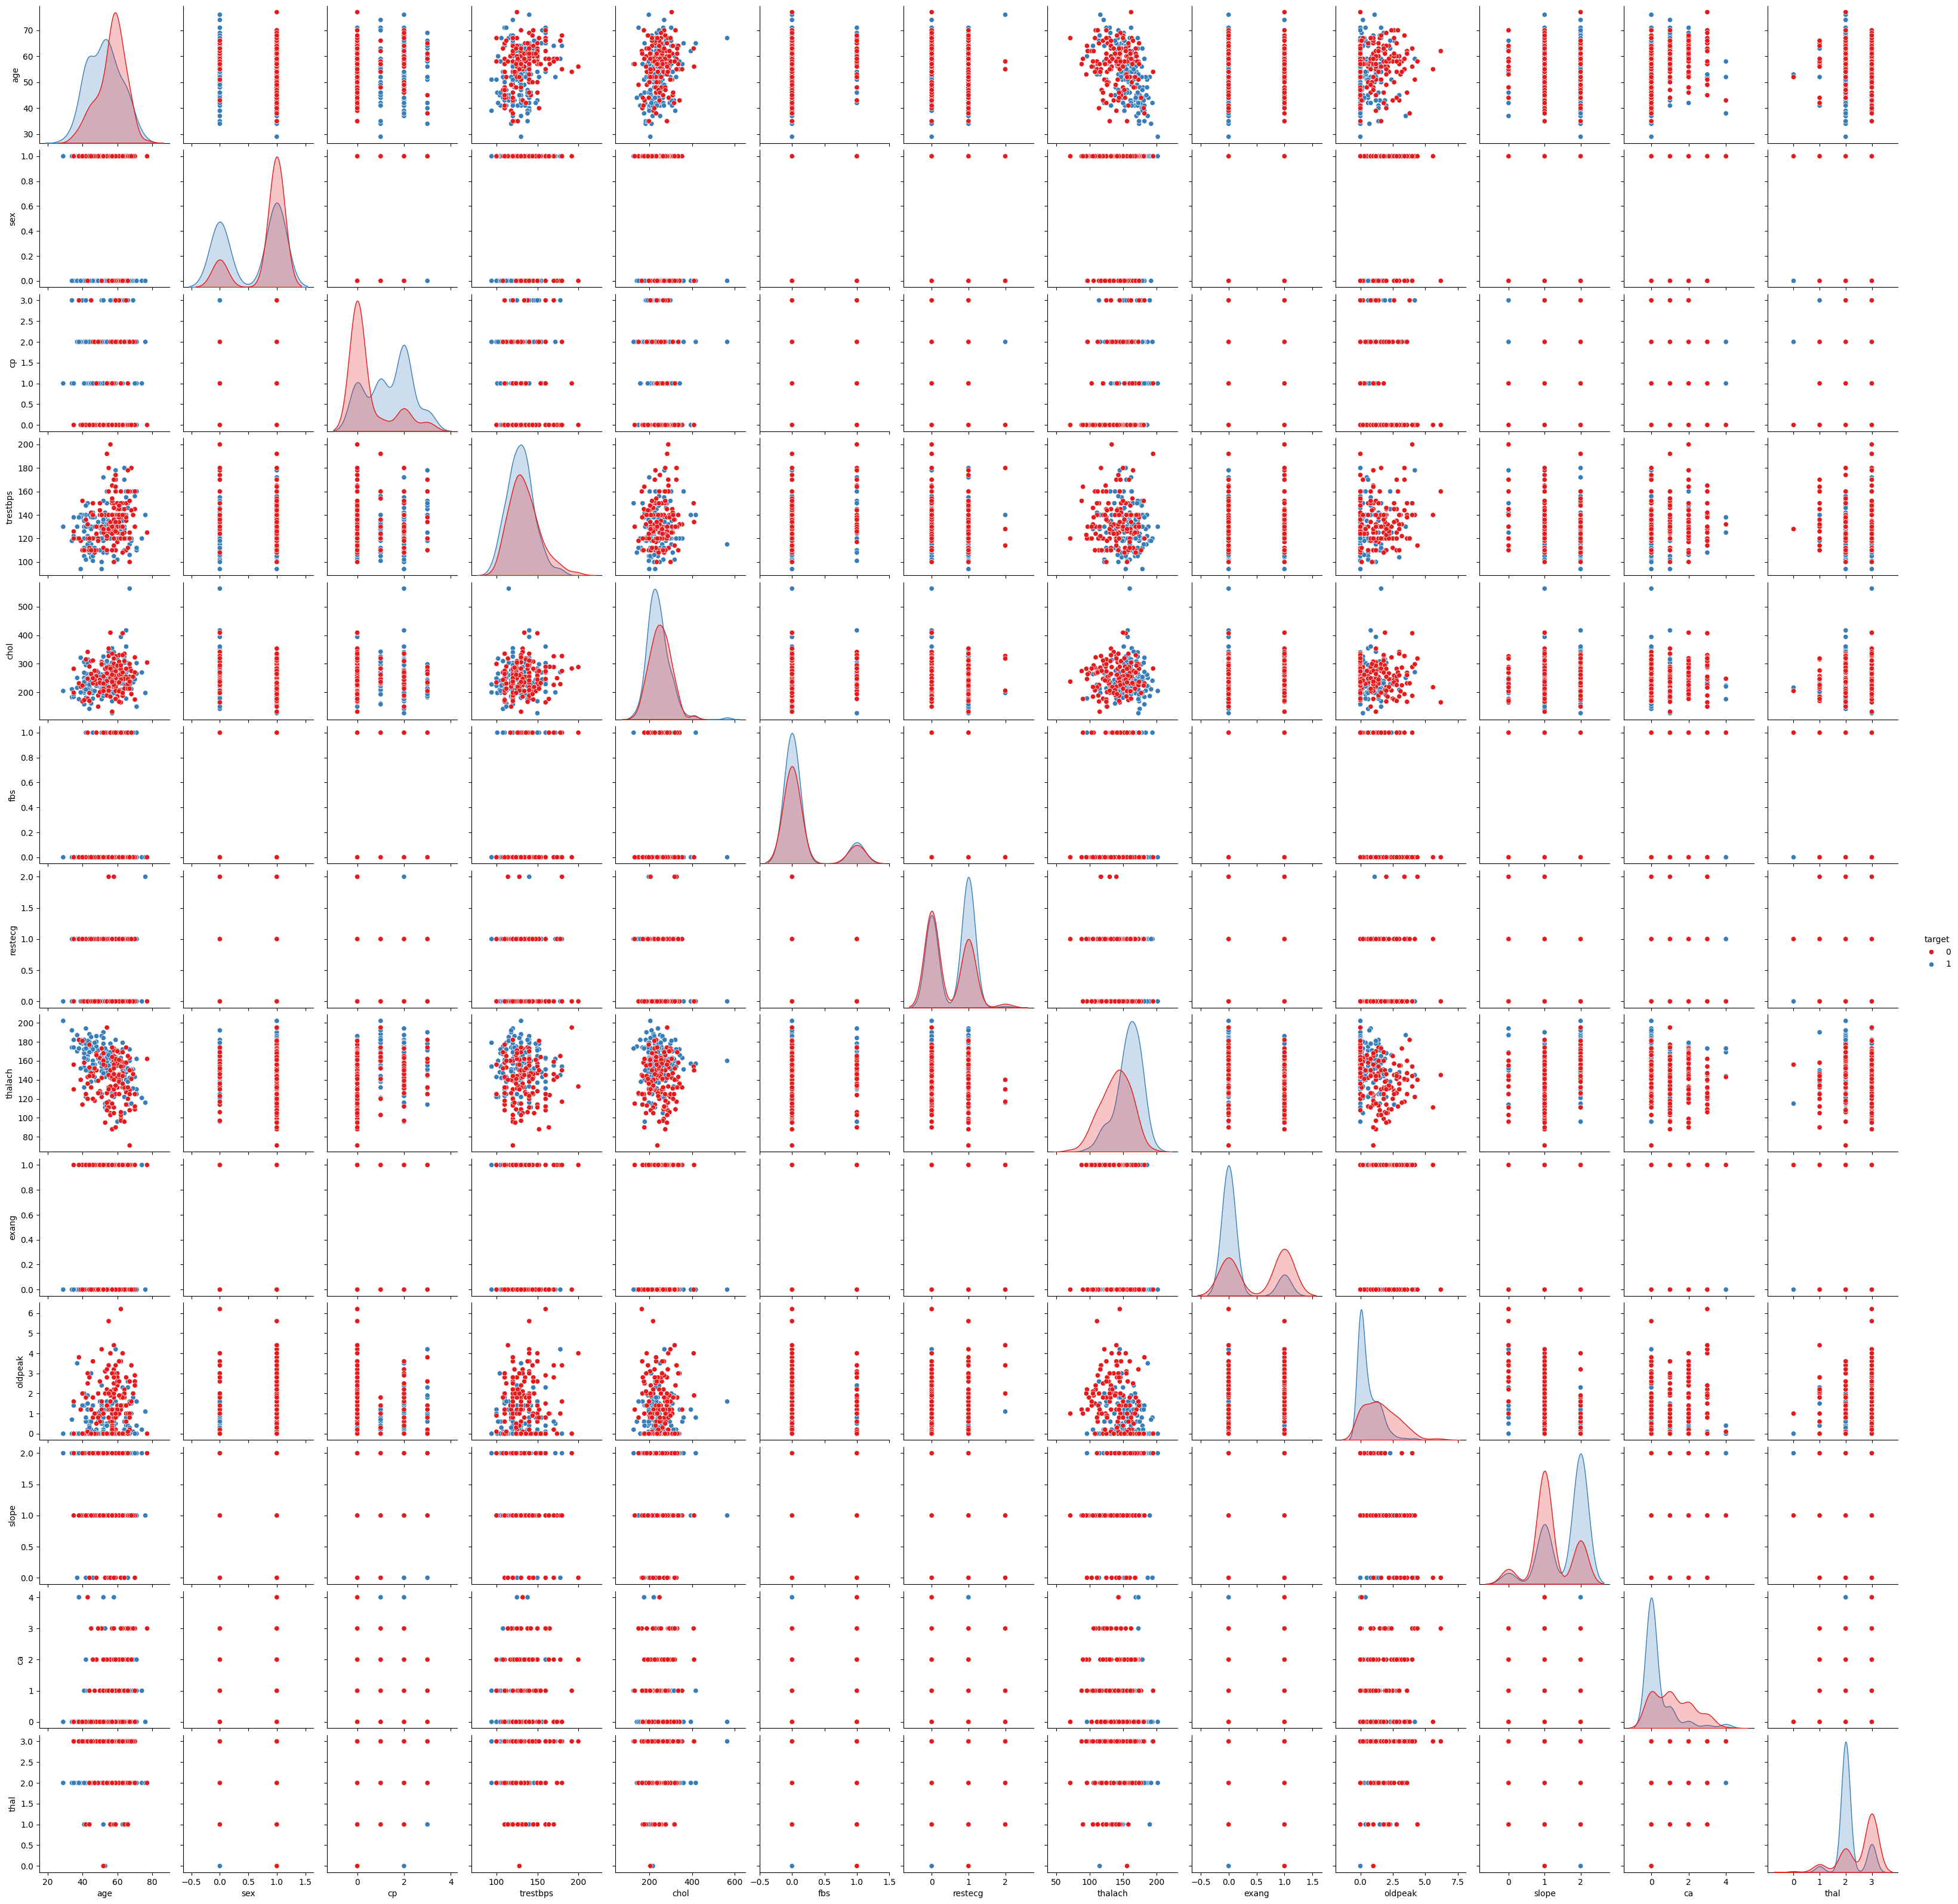

In [8]:
# Pair Plot
sns.pairplot(df, hue='target', palette='Set1')
plt.show()

In [9]:
########################################
### Logistic Regression (FULL MODEL) ###
########################################

In [10]:
# Define features and target
X = df.drop(columns='target')
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class (class 1)

# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Create a list to store the metrics
models_metrics = []

# Append to Model Metrics
models_metrics.append({
    'Model': 'Logistic Regression (Full)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [12]:
# Evaluate the model
target_names = ['Yes', 'No']
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names = target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         Yes       0.83      0.86      0.85        29
          No       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



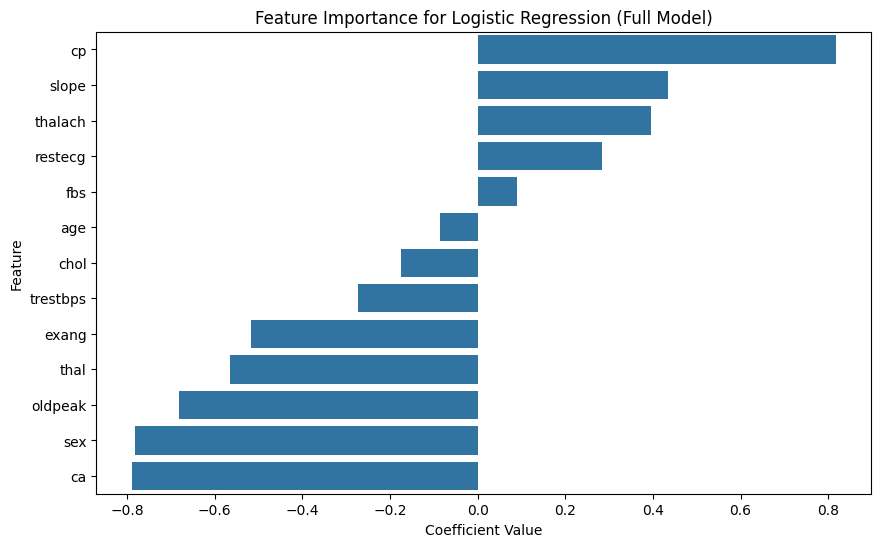

In [13]:
# Get feature importance
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance for Logistic Regression (Full Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

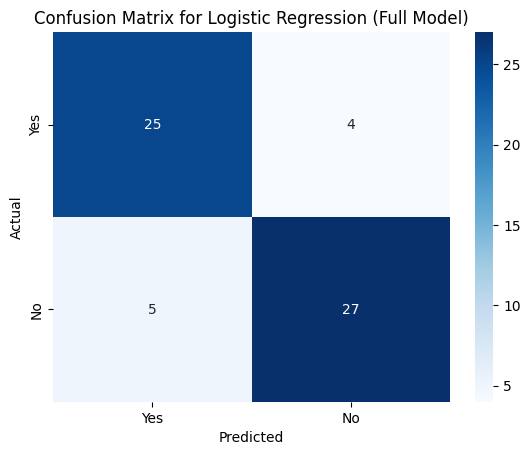

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for Logistic Regression (Full Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

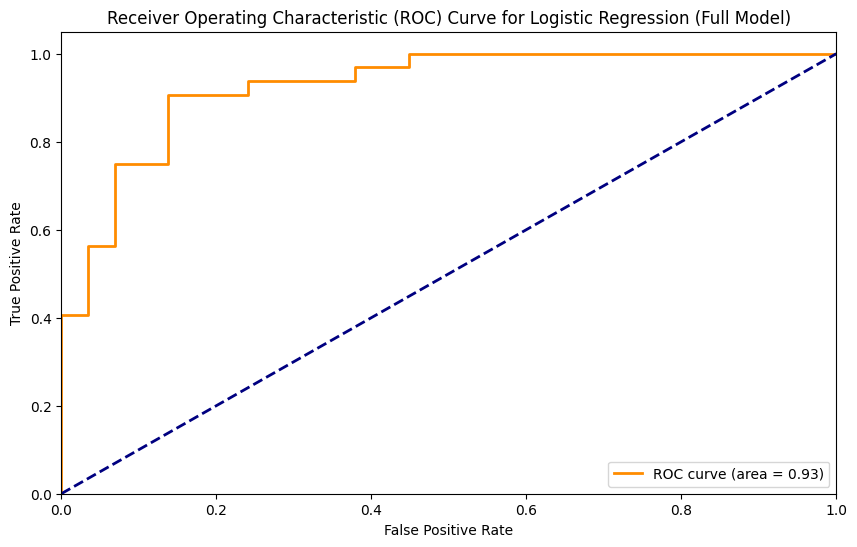

In [15]:
# ROC Curve

# Get decision function scores
y_score = model.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression (Full Model)')
plt.legend(loc='lower right')
plt.show()

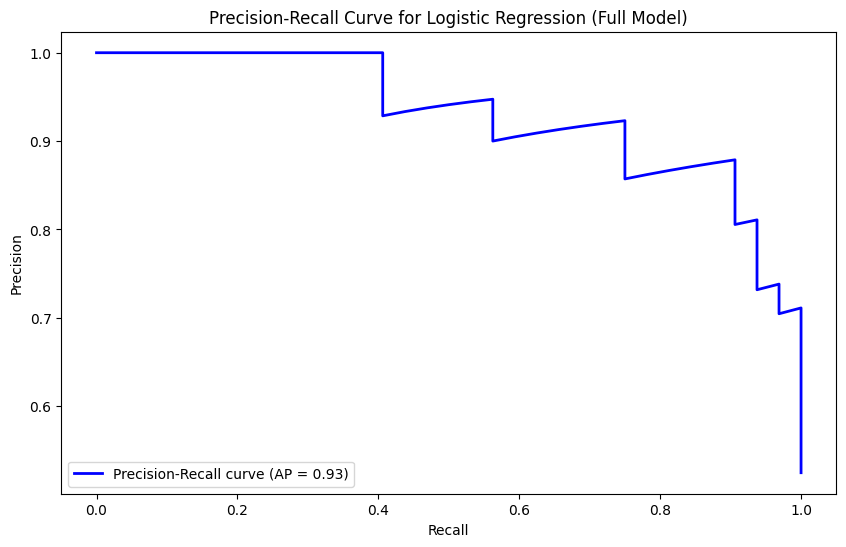

In [16]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression (Full Model)')
plt.legend(loc='lower left')
plt.show()

In [17]:
####################################
### Filter by Variance Threshold ###
####################################

In [18]:
# CHANGE threshold to change number of variables in reduced model

In [19]:
# Separate the outcome variable 'target'
outcome = df['target']
df_no_outcome = df.drop(columns=['target'])

# Set a variance threshold (remove features with variance below ***0.50***)
threshold = 0.50 # CAN CHANGE THIS
selector = VarianceThreshold(threshold=threshold)

# Fit to the data
df_reduced_var = selector.fit_transform(df_no_outcome)

# Get the names of the remaining features
remaining_features = df_no_outcome.columns[selector.get_support()]

print(f'Remaining features after variance threshold filtering: {remaining_features.tolist()}')

# Create a DataFrame with the reduced set of features and add the outcome variable back
df_reduced = pd.DataFrame(df_reduced_var, columns=remaining_features)
df_reduced['target'] = outcome.values

print(f'Final features: {df_reduced.columns.tolist()}')

# Display the first few rows of the reduced DataFrame
df_reduced.head()

Remaining features after variance threshold filtering: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Final features: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']


age   cp  trestbps   chol  thalach  oldpeak   ca  target
0  63.0  3.0     145.0  233.0    150.0      2.3  0.0       1
1  37.0  2.0     130.0  250.0    187.0      3.5  0.0       1
2  41.0  1.0     130.0  204.0    172.0      1.4  0.0       1
3  56.0  1.0     120.0  236.0    178.0      0.8  0.0       1
4  57.0  0.0     120.0  354.0    163.0      0.6  0.0       1

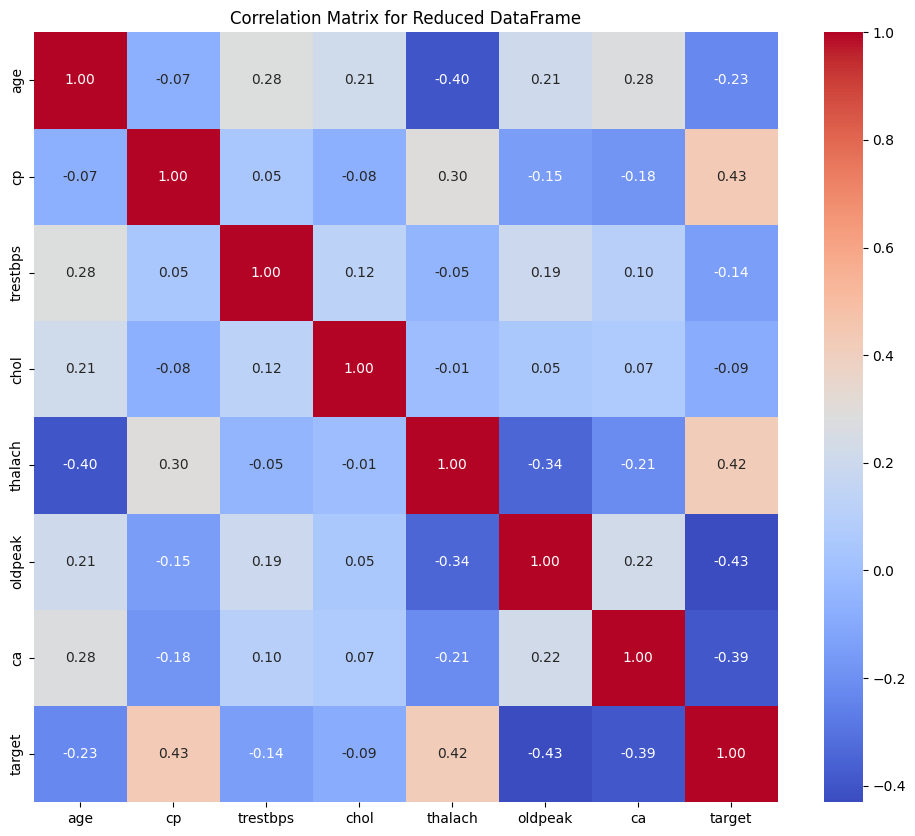

In [20]:
# Compute the correlation matrix for reduced DataFrame
corr_matrix = df_reduced.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Reduced DataFrame')
plt.show()

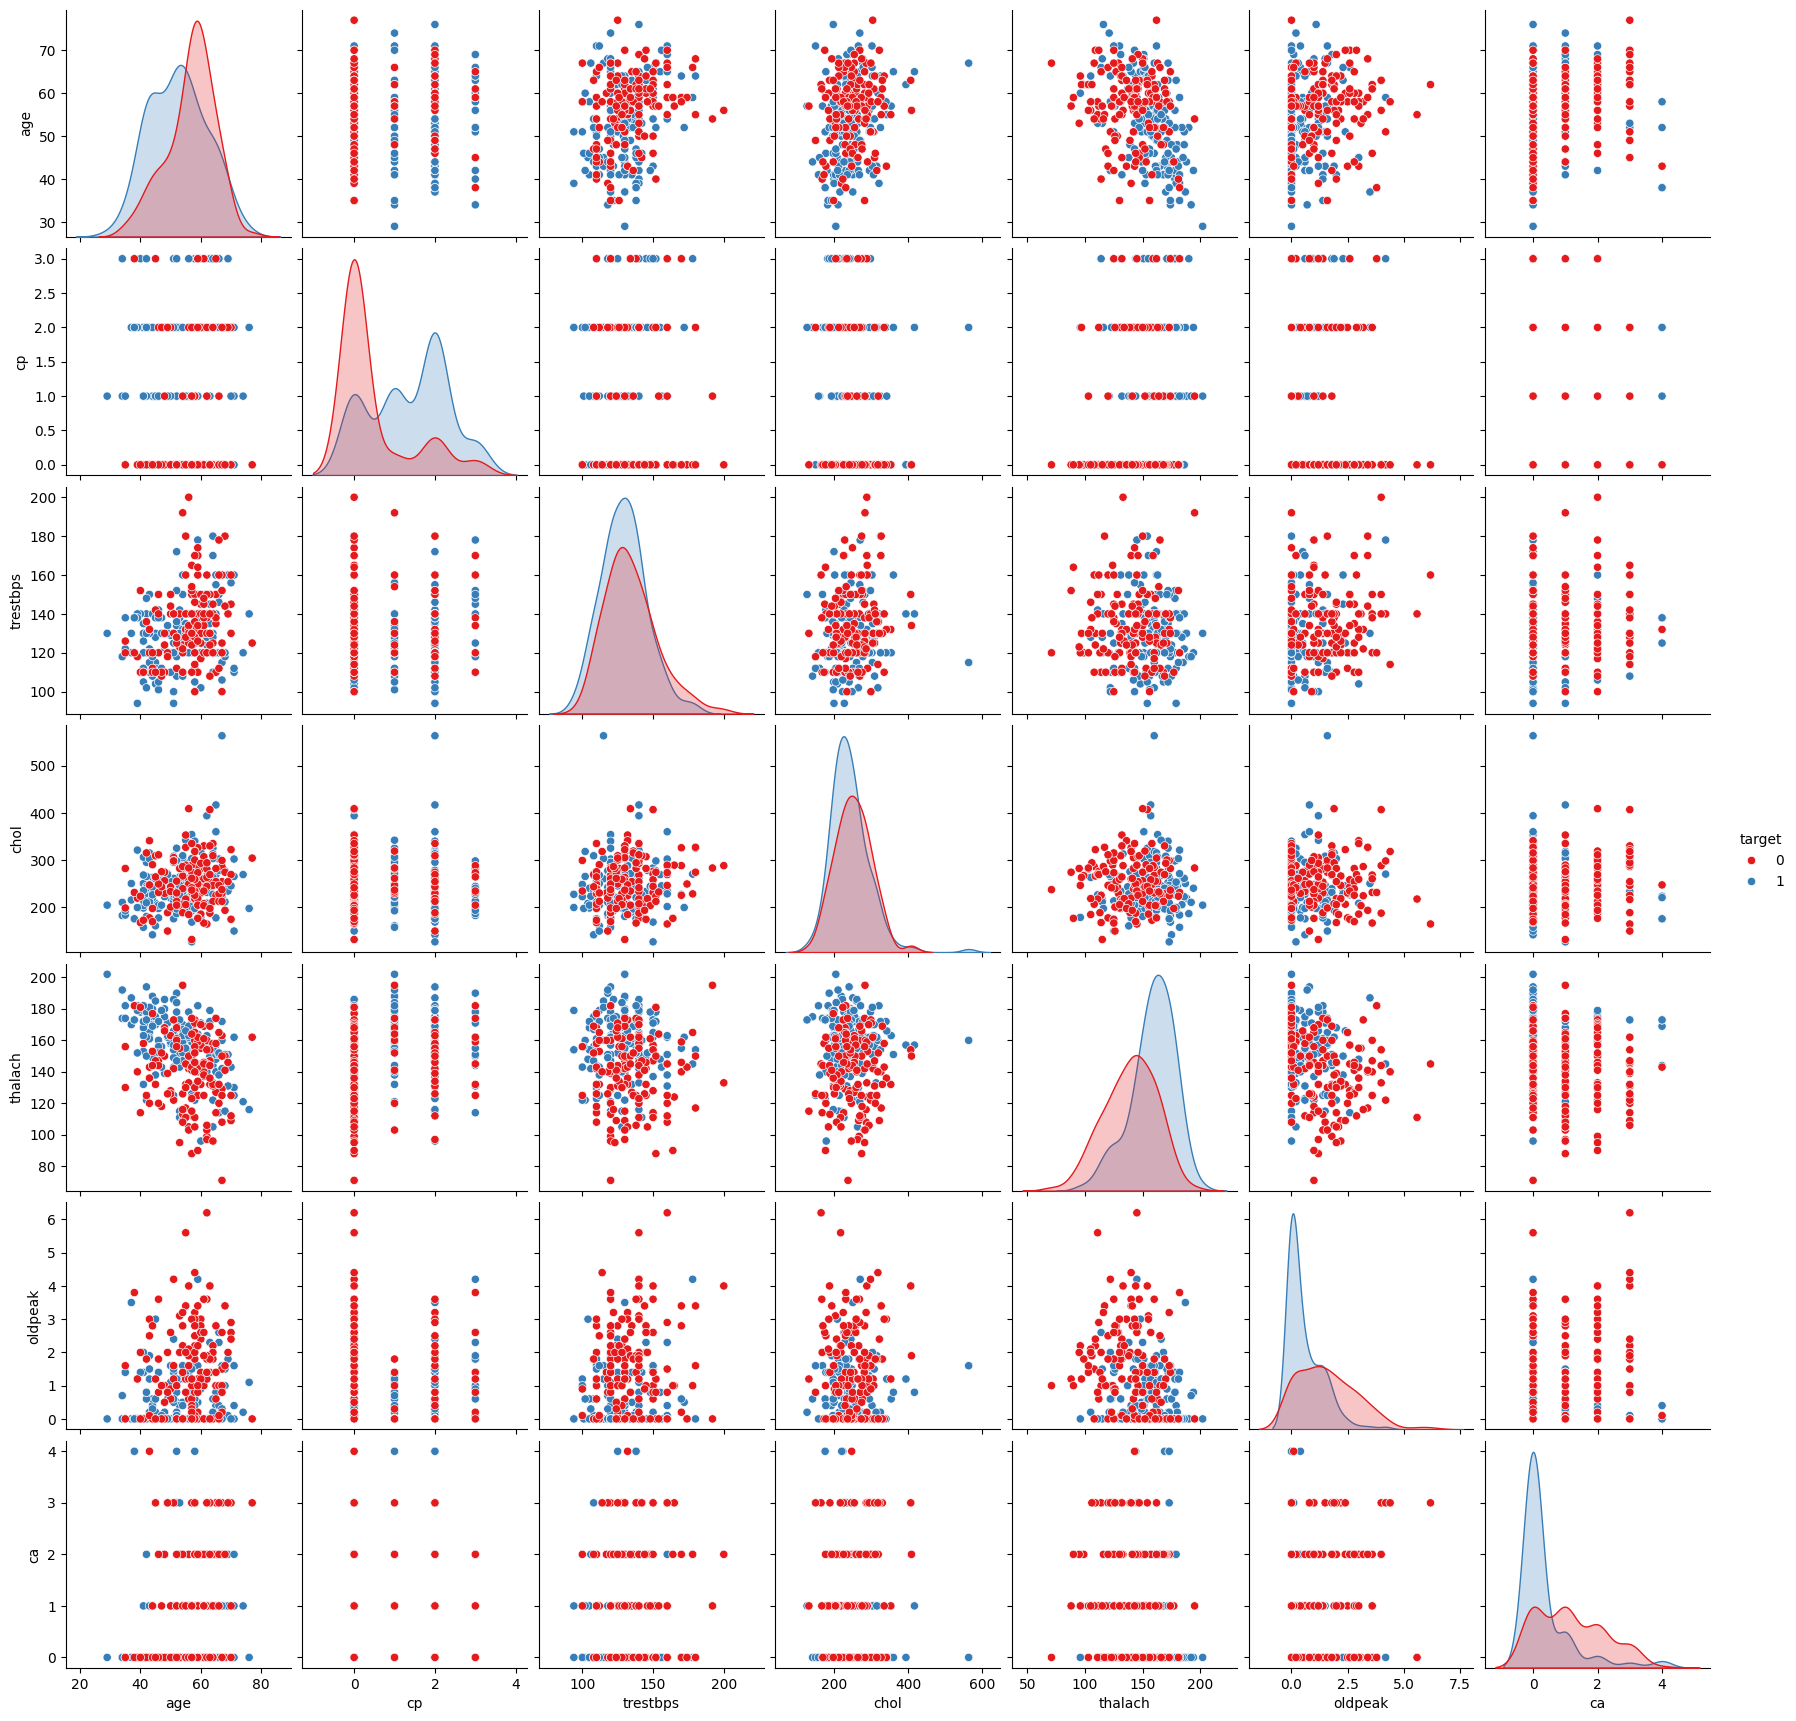

In [21]:
# Pair Plot
sns.pairplot(df_reduced, hue='target', palette='Set1')
plt.show()

In [22]:
##########################################
### Logistic Regression: Reduced Model ###
##########################################

In [23]:
# Define features and target
X = df_reduced.drop(columns='target')
y = df_reduced['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class (class 1)

# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Logistic Regression (Reduced)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob) 
})

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



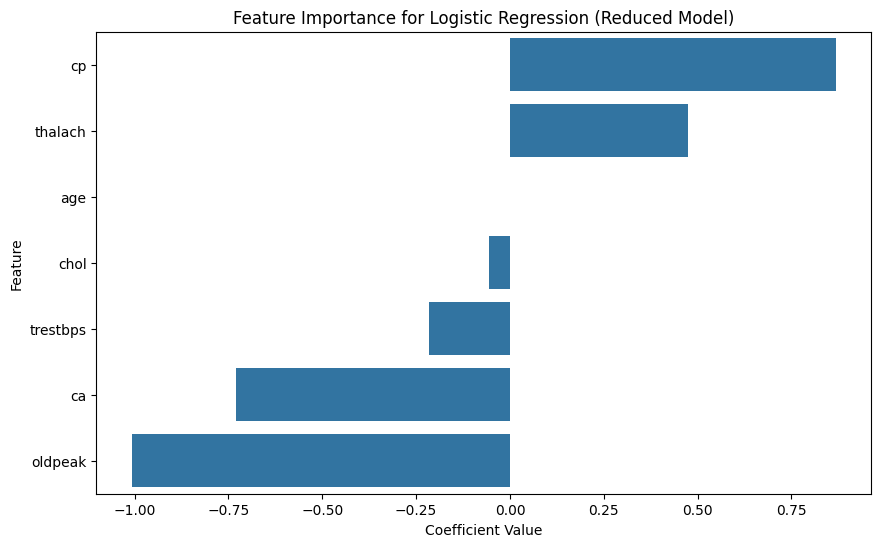

In [26]:
# Get feature importance
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance for Logistic Regression (Reduced Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

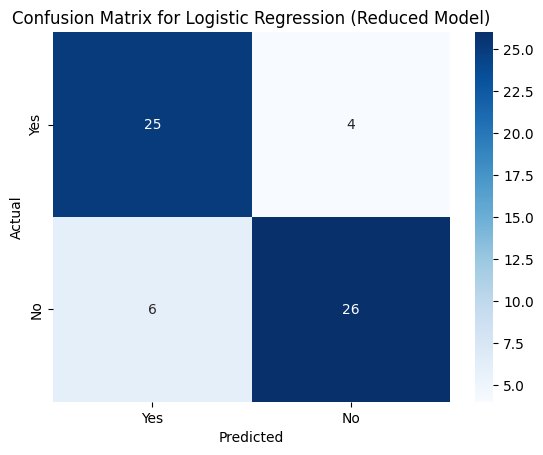

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for Logistic Regression (Reduced Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

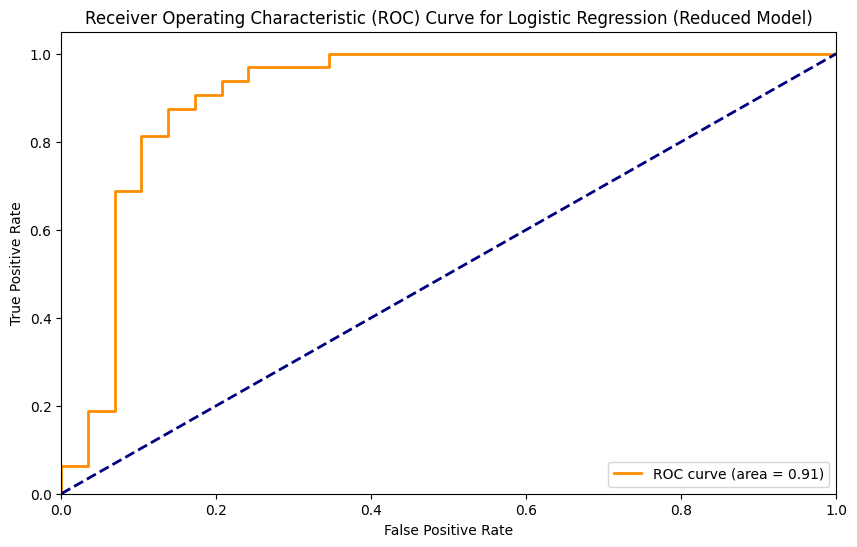

In [28]:
# ROC Curve

# Get decision function scores
y_score = model.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression (Reduced Model)')
plt.legend(loc='lower right')
plt.show()

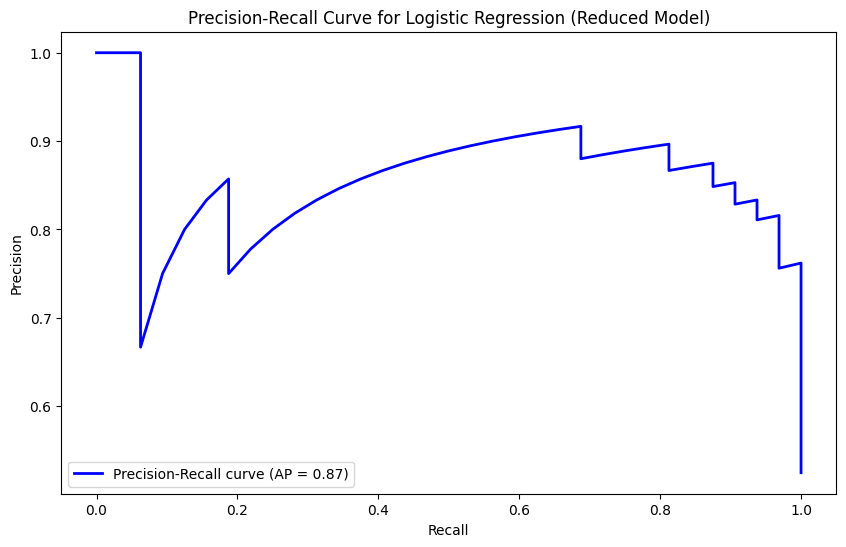

In [29]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression (Reduced Model)')
plt.legend(loc='lower left')
plt.show()

In [30]:
#####################
### Decision Tree ###
#####################

In [31]:
# Separate features and target variable
X = df_reduced.drop(columns=['target'])
y = df_reduced['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

In [32]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [34]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[24  5]
 [11 21]]


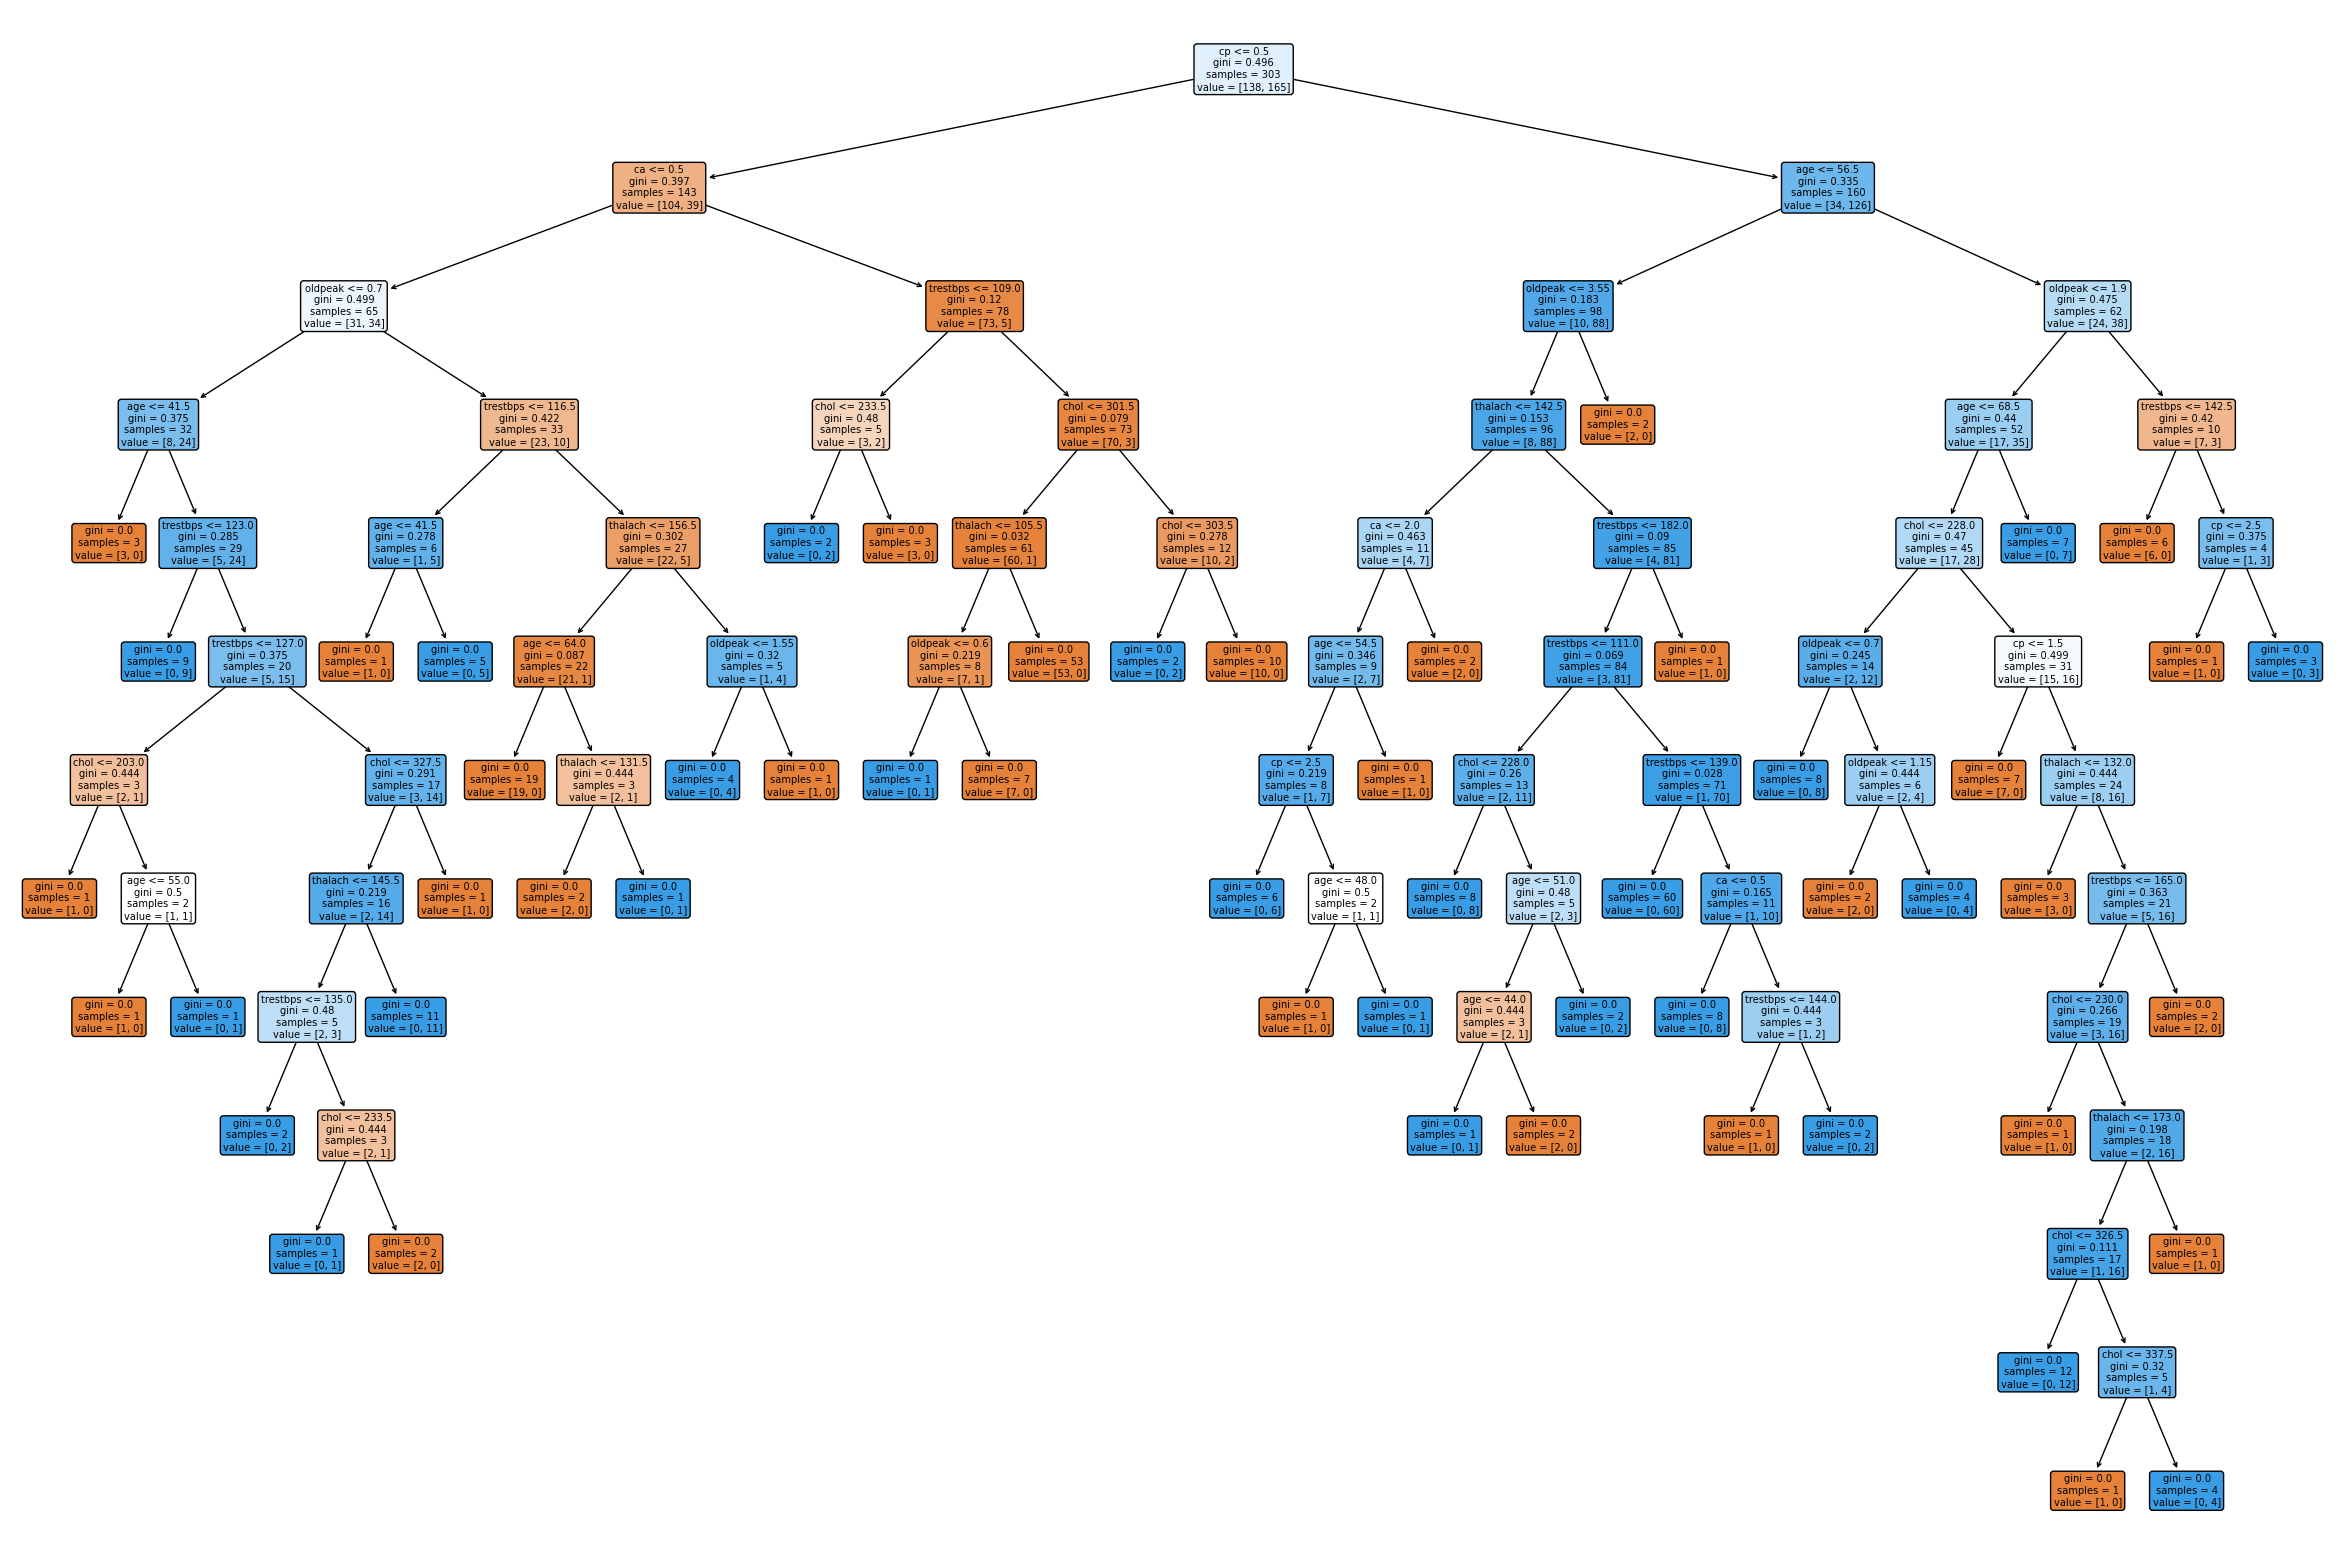

In [35]:
# Train a decision tree classifier
dt_classifier_pruned = DecisionTreeClassifier(random_state=42)  # Can set max_depth to prune the tree
dt_classifier_pruned.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dt_classifier_pruned, filled=True, feature_names=X.columns, rounded=True)
plt.show()

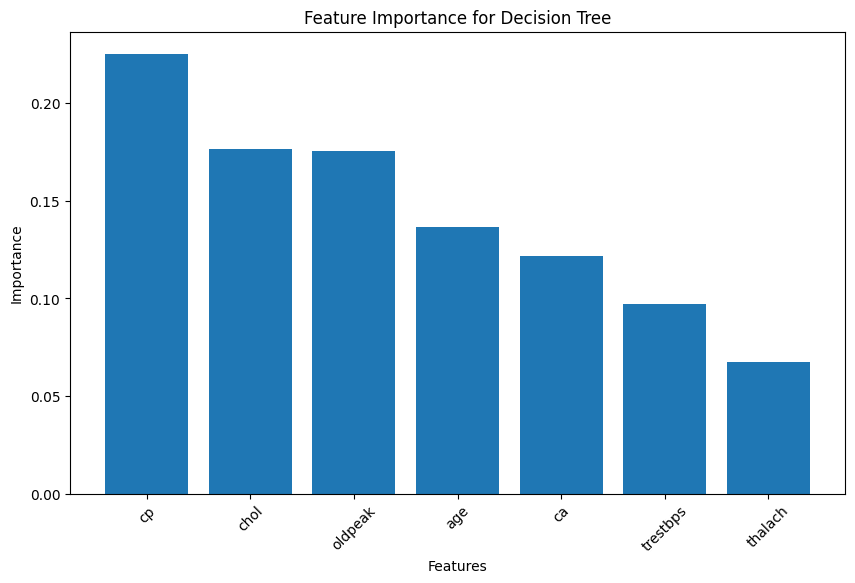

In [36]:
# Feature Importance Plot

# Get feature importances from the trained model
feature_importances = dt_classifier.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importance for Decision Tree')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

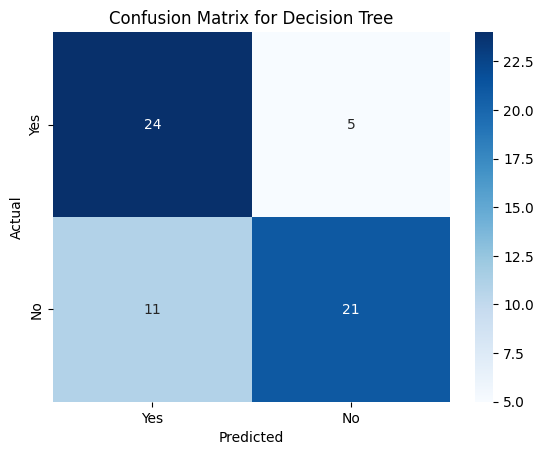

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

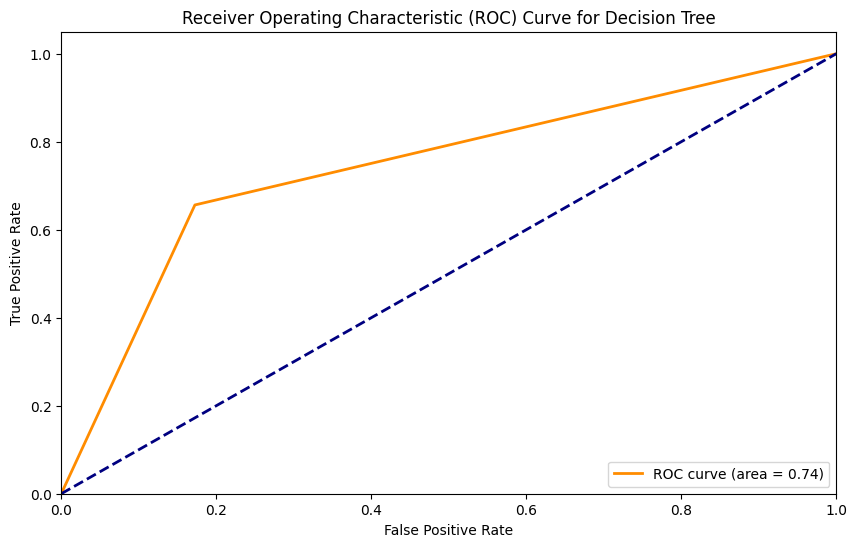

In [38]:
# ROC Curve

# Predict probabilities for the test set
y_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

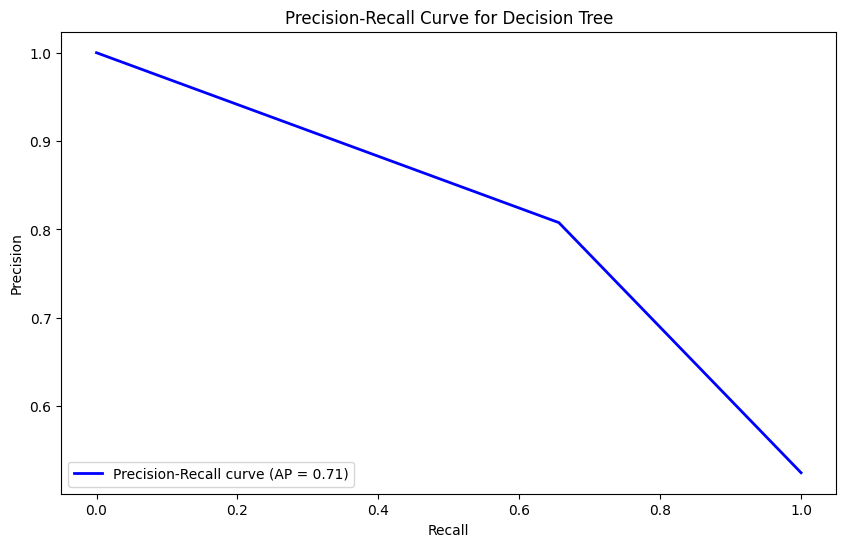

In [39]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc='lower left')
plt.show()

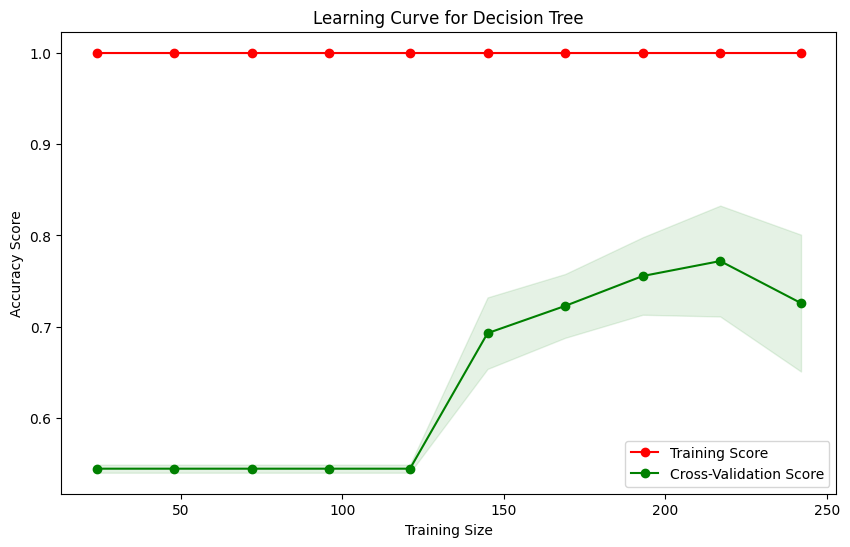

In [40]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Decision Tree')
plt.legend(loc='best')
plt.show()

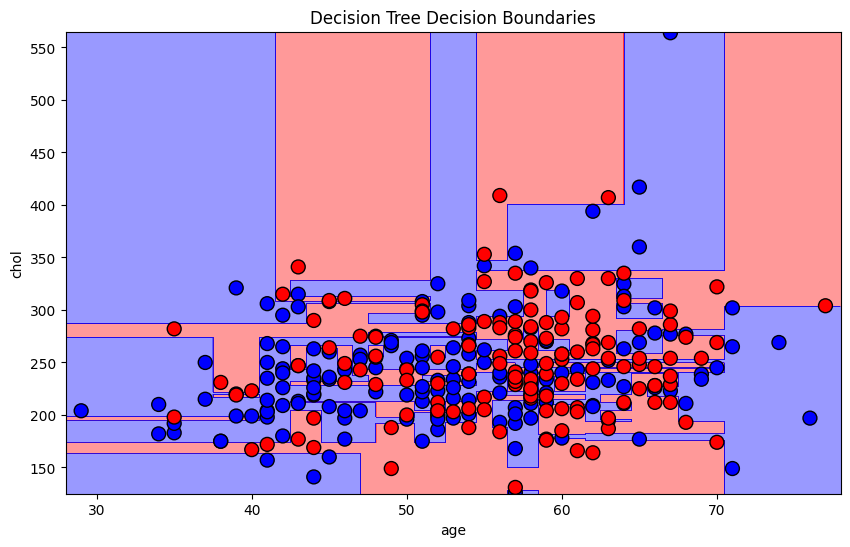

In [41]:
# Decision Boundary Visualization

# Select two features (age and cholesterol) for simplicity and convert to NumPy array
X_simple = X.iloc[:, [0, 3]].values # age and cholesterol
y_simple = y.values

# Train a new decision tree classifier on the simplified data
clf_simple = DecisionTreeClassifier(random_state=42)
clf_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age
plt.ylabel(X.columns[3]) # cholesterol
plt.title('Decision Tree Decision Boundaries')
plt.show()

In [42]:
##################################
### Naive Bayes Classification ###
##################################

In [43]:
# Separate features and target variable
X = df_reduced.drop(columns=['target'])
y = df_reduced['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

In [44]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob) 
})

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [46]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[25  4]
 [ 6 26]]


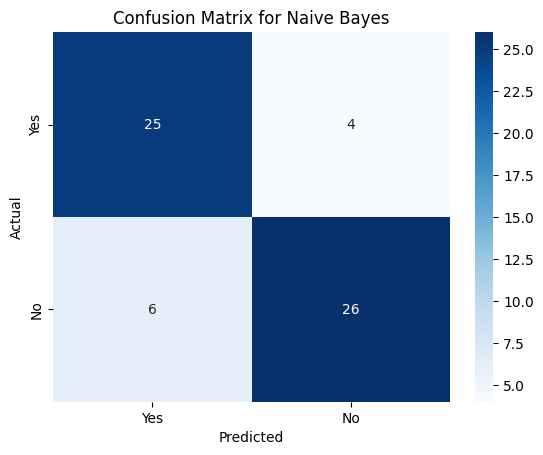

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

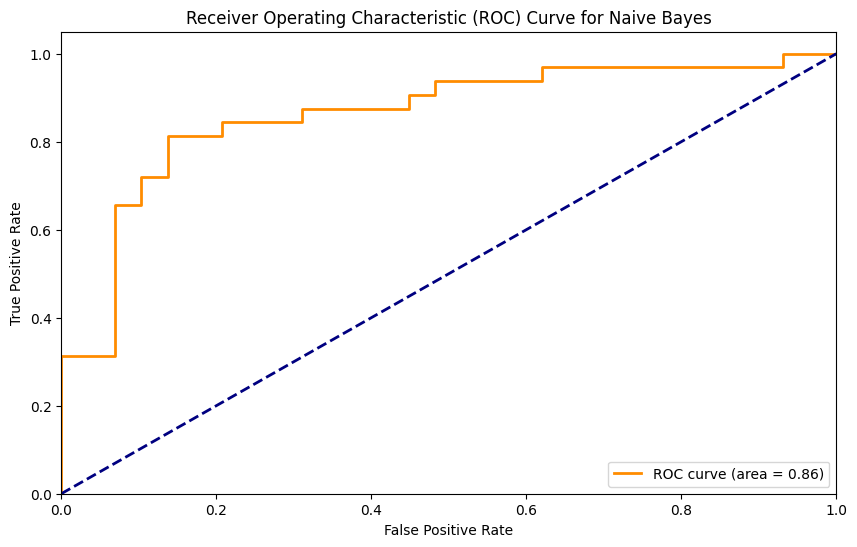

In [48]:
# ROC Curve

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

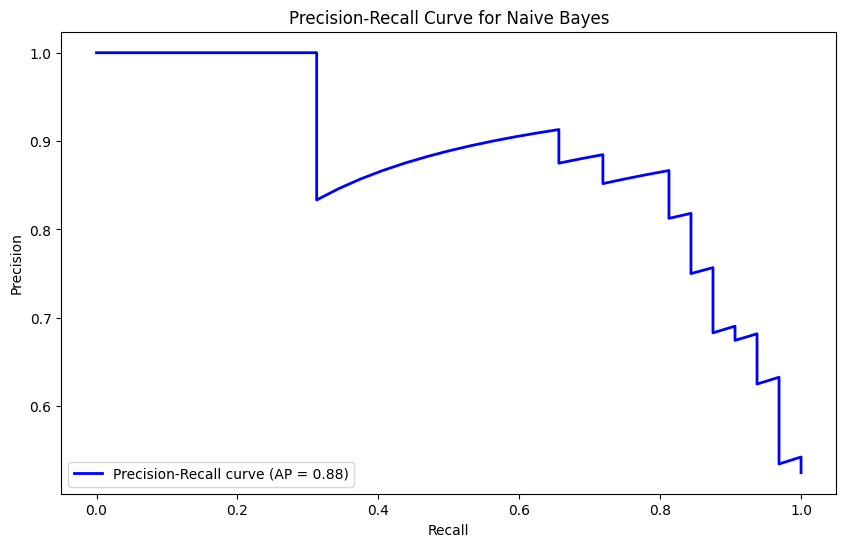

In [49]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.legend(loc='lower left')
plt.show()

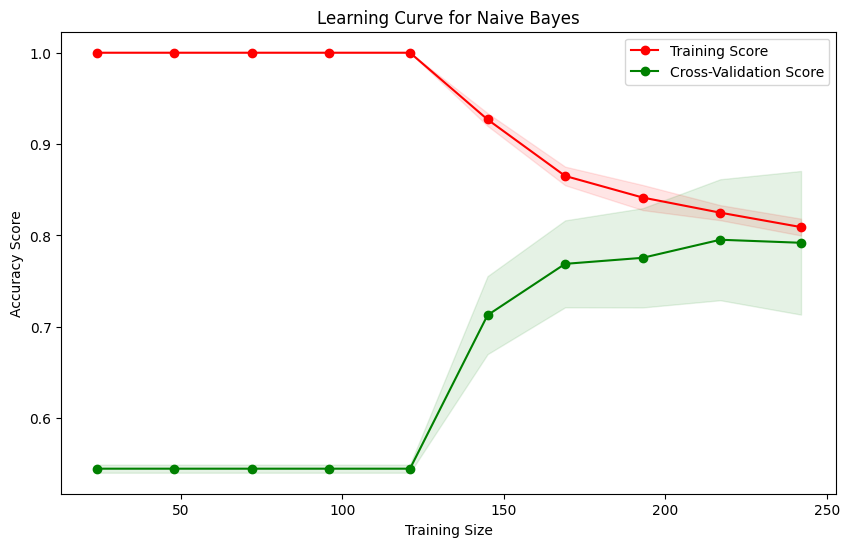

In [50]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    nb_classifier, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Naive Bayes')
plt.legend(loc='best')
plt.show()

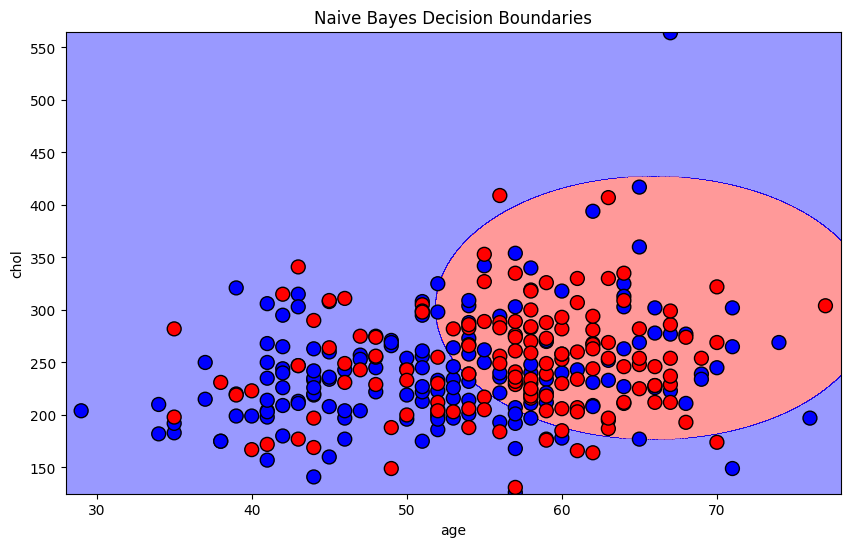

In [51]:
# Visualizing the Naive Bayes Decision Boundaries

# Select two features for simplicity (same as before)
X_simple = X.iloc[:, [0, 3]].values  # age and cholesterol
y_simple = y.values

# Train the Naive Bayes classifier on the simplified data
nb_classifier_simple = GaussianNB()
nb_classifier_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = nb_classifier_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age
plt.ylabel(X.columns[3]) # cholesterol
plt.title('Naive Bayes Decision Boundaries')
plt.show()

In [52]:
####################################
### Linear Discriminant Analysis ###
####################################

In [53]:
# Train the LDA model
lda_classifier = LDA()
lda_classifier.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = lda_classifier.predict_proba(X_test)[:, 1]

# Predict on the test set
y_pred = lda_classifier.predict(X_test)

In [54]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Linear Discriminant Analysis (LDA)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [56]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



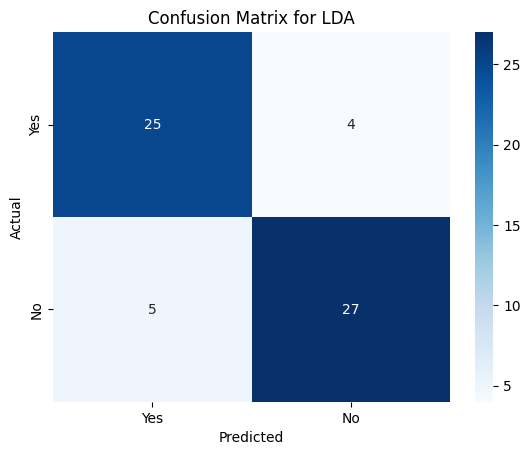

In [57]:
# Confusion Matrix for LDA
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

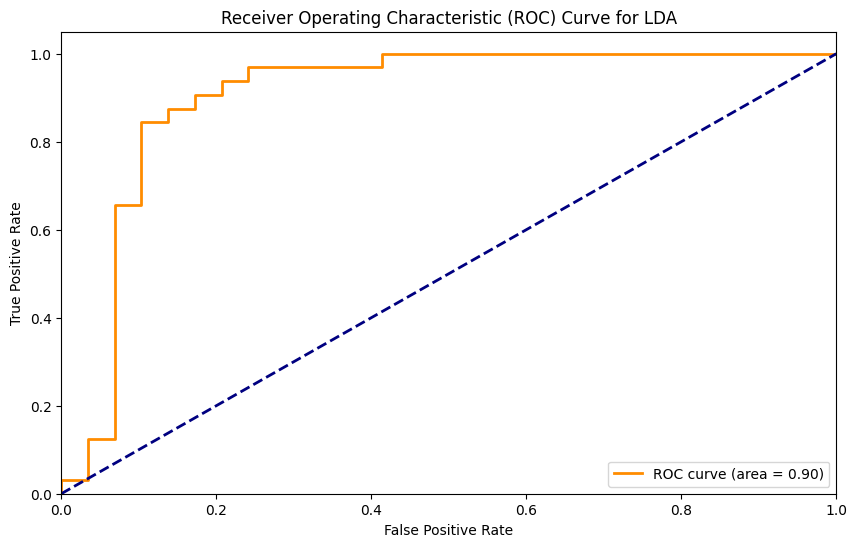

In [58]:
# ROC Curve for LDA

# Predict the probability of the positive class
y_prob = lda_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class (e.g., 'Died')

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LDA')
plt.legend(loc='lower right')
plt.show()

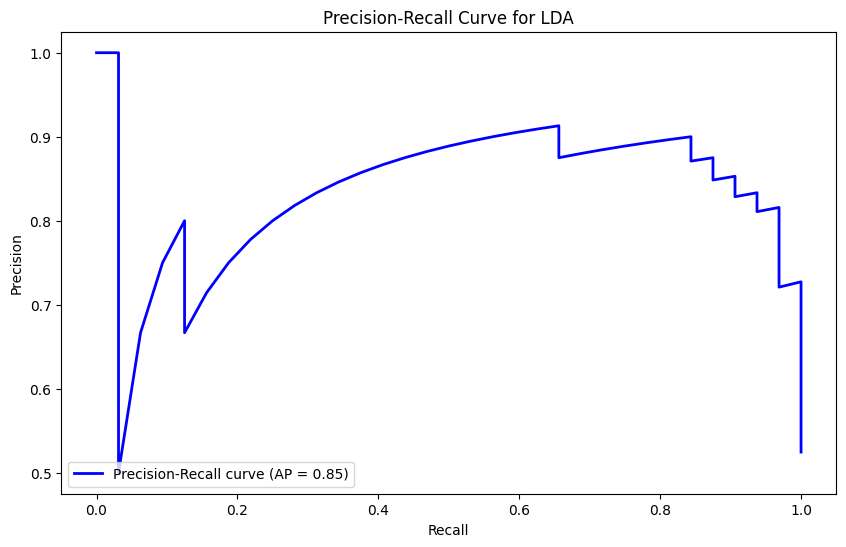

In [59]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = lda_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LDA')
plt.legend(loc='lower left')
plt.show()

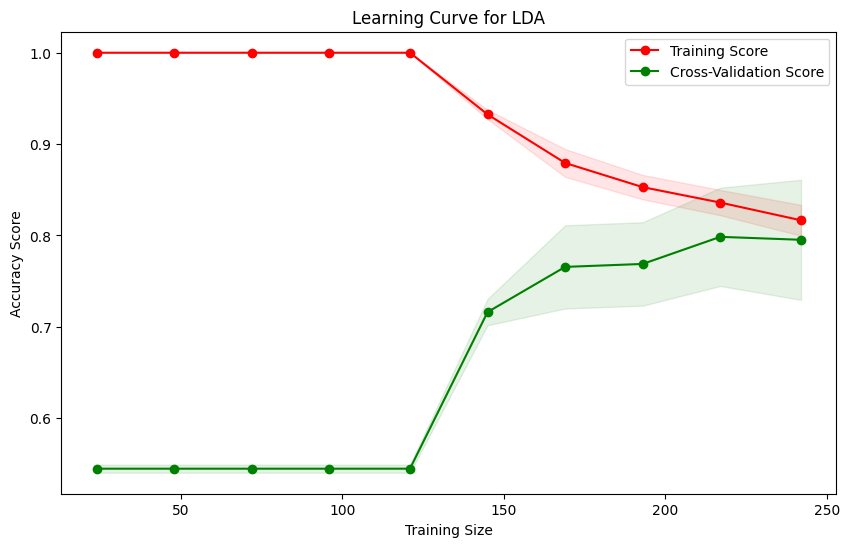

In [60]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lda_classifier, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for LDA')
plt.legend(loc='best')
plt.show()

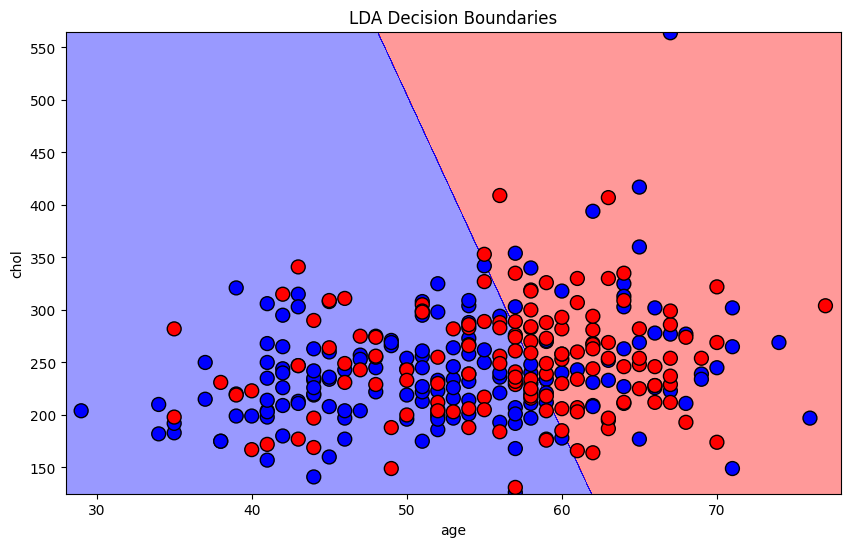

In [61]:
# Decision Boundary for LDA

# Select two features for simplicity (same as before)
X_simple = X.iloc[:, [0, 3]].values # age and cholesterol
y_simple = y.values

# Train LDA on the simplified data
lda_classifier_simple = LDA()
lda_classifier_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = lda_classifier_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age and cholesterol
plt.ylabel(X.columns[3]) # cholesterol
plt.title('LDA Decision Boundaries')
plt.show()

In [62]:
#######################################
### Quadratic Discriminant Analysis ###
#######################################

In [63]:
# Train the QDA model
qda_classifier = QDA()
qda_classifier.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = qda_classifier.predict_proba(X_test)[:, 1]

# Predict on the test set
y_pred = qda_classifier.predict(X_test)

In [64]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Quadratic Discriminant Analysis (QDA)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [65]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


In [66]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



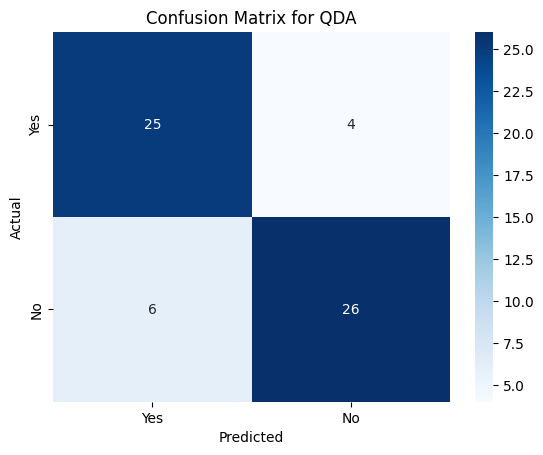

In [67]:
# Confusion Matrix for QDA
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for QDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

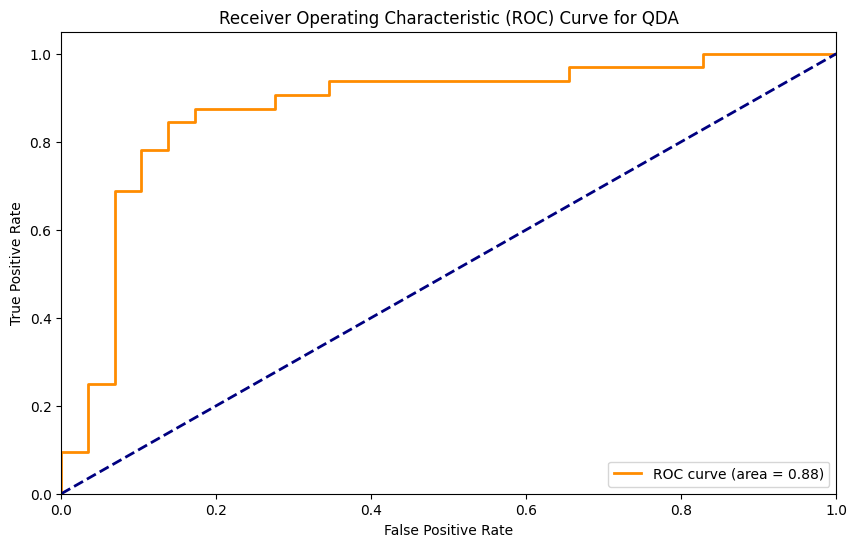

In [68]:
# ROC Curve for QDA

y_prob = qda_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for QDA')
plt.legend(loc='lower right')
plt.show()

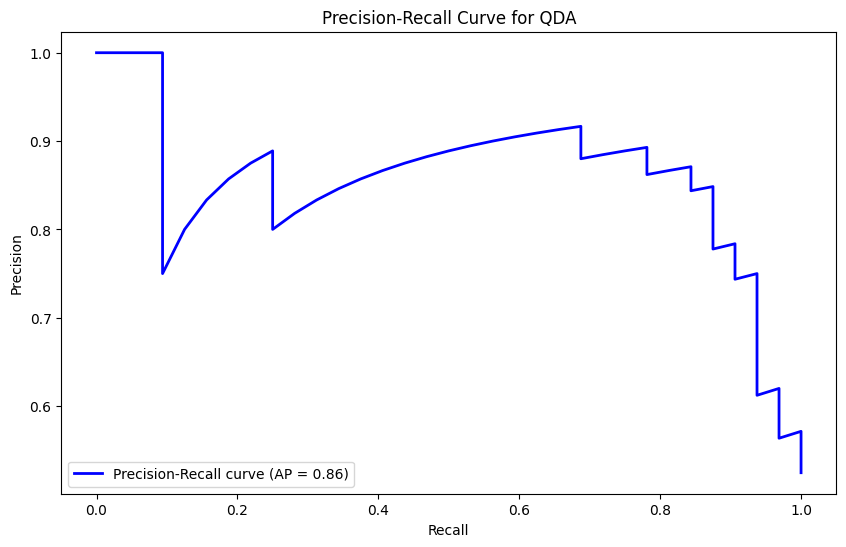

In [69]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = qda_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for QDA')
plt.legend(loc='lower left')
plt.show()

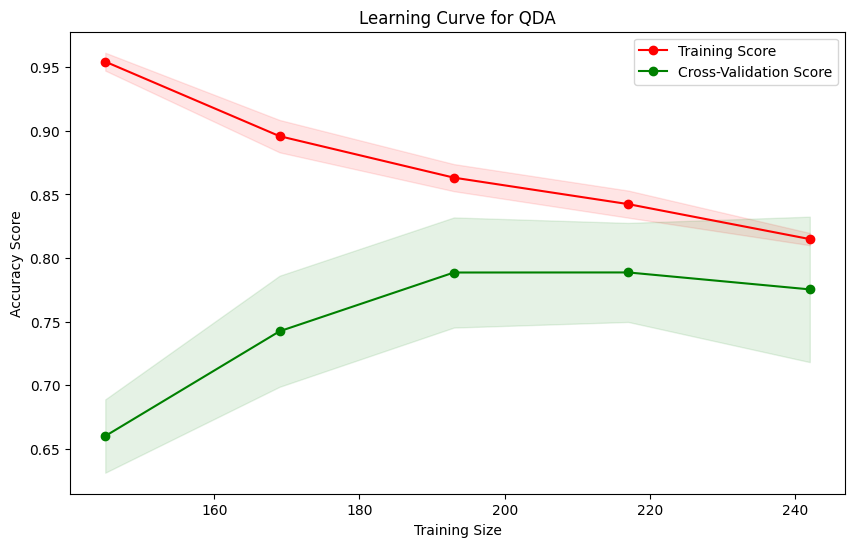

In [70]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    qda_classifier, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for QDA')
plt.legend(loc='best')
plt.show()

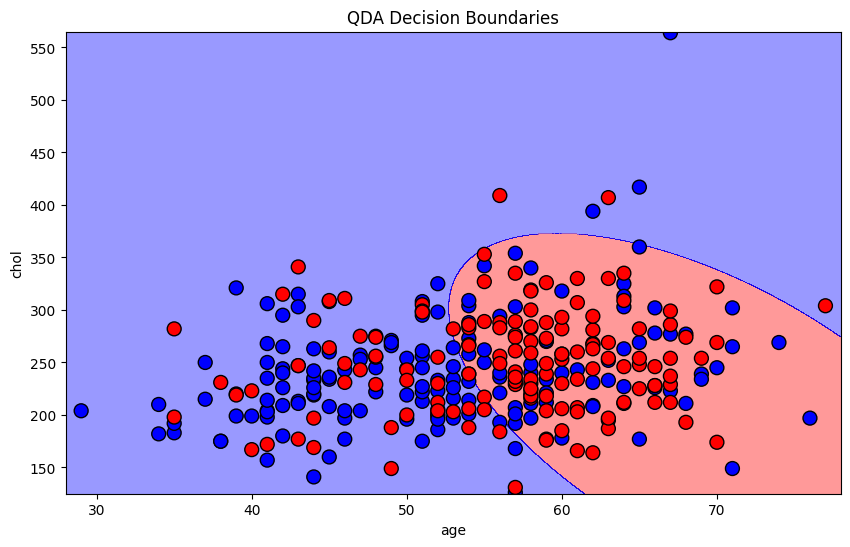

In [71]:
# Decision Boundary for QDA

# Select two features for simplicity (same as before)
X_simple = X.iloc[:, [0, 3]].values # age and cholesterol
y_simple = y.values

# Train QDA on the simplified data
qda_classifier_simple = QDA()
qda_classifier_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = qda_classifier_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age
plt.ylabel(X.columns[3]) # cholesterol
plt.title('QDA Decision Boundaries')
plt.show()

In [72]:
####################################
### Support Vector Machine (SVM) ###
####################################

In [73]:
# Train the SVM model
svm_classifier = SVC(kernel='linear', probability=True)  # For kernel, use 'linear', 'rbf', 'poly', etc. for different kernels
svm_classifier.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [74]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Support Vector Machine (SVM)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [76]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



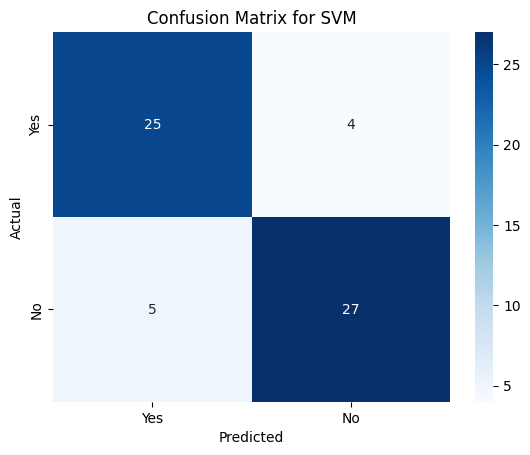

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

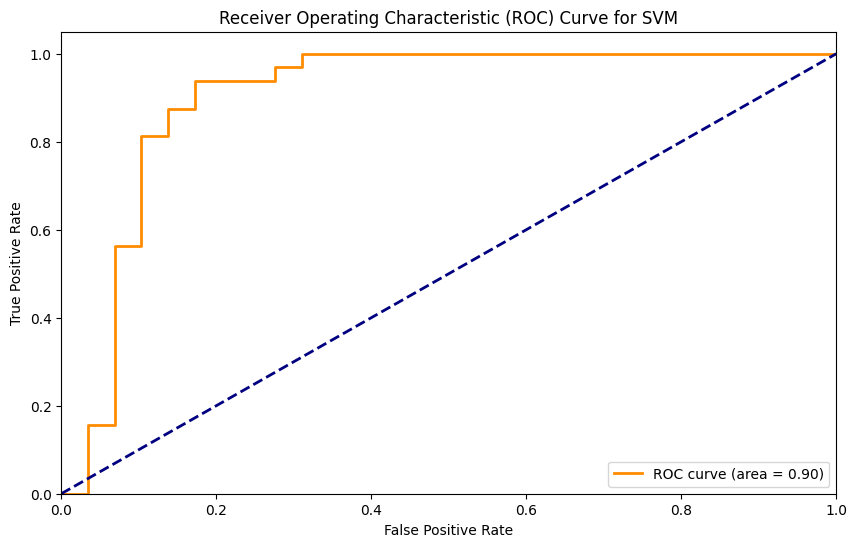

In [78]:
# ROC Curve for SVM
y_prob = svm_classifier.predict_proba(X_test)[:, 1]  # SVM with probability=True can predict probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()

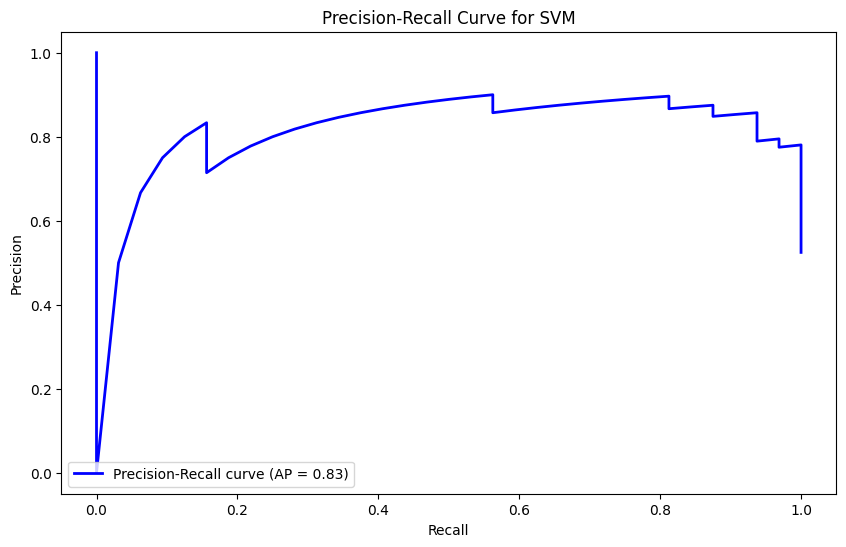

In [79]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='lower left')
plt.show()

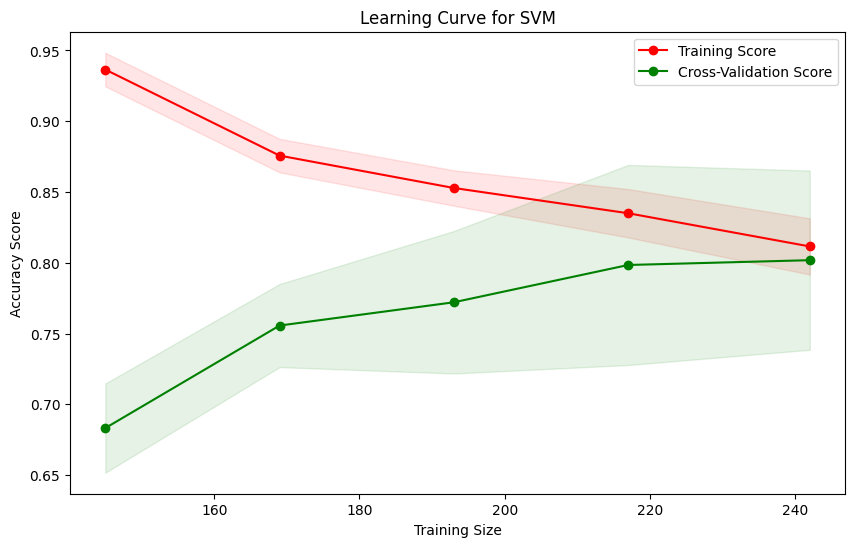

In [80]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for SVM')
plt.legend(loc='best')
plt.show()

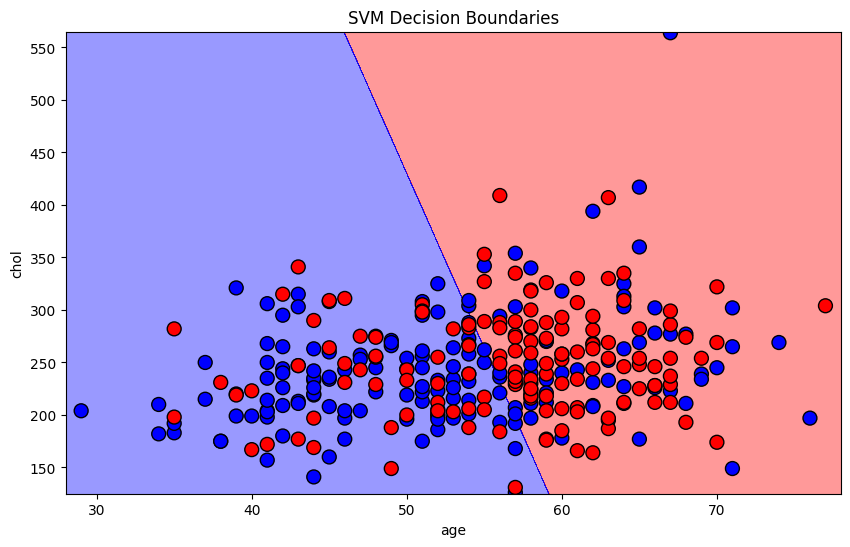

In [81]:
# Decision Boundary for SVM

# Select two features for simplicity (same as before)
X_simple = X.iloc[:, [0, 3]].values # age and cholesterol
y_simple = y.values

# Train SVM on the simplified data
svm_classifier_simple = SVC(kernel='linear') # For kernel, use 'linear', 'rbf', 'poly', etc. for different kernels
svm_classifier_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_classifier_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age
plt.ylabel(X.columns[3]) # cholesterol
plt.title('SVM Decision Boundaries')
plt.show()

In [82]:
##################################
### K Nearest Neighbors (KNN) ###
##################################

In [83]:
# Train the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Can change the number of neighbors
knn_classifier.fit(X_train, y_train)

# Get the probability of the positive class (class 1)
y_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

In [84]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'K Nearest Neighbors (KNN)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [85]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


In [86]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



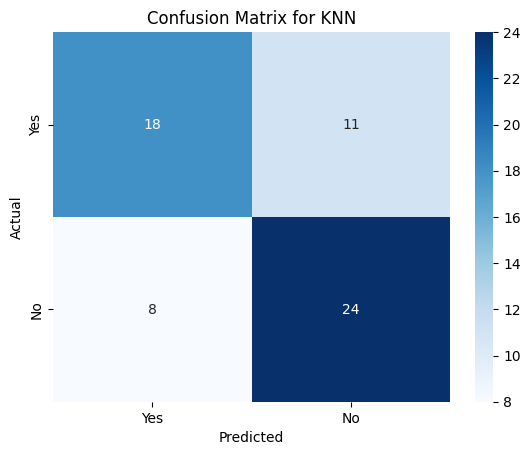

In [87]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

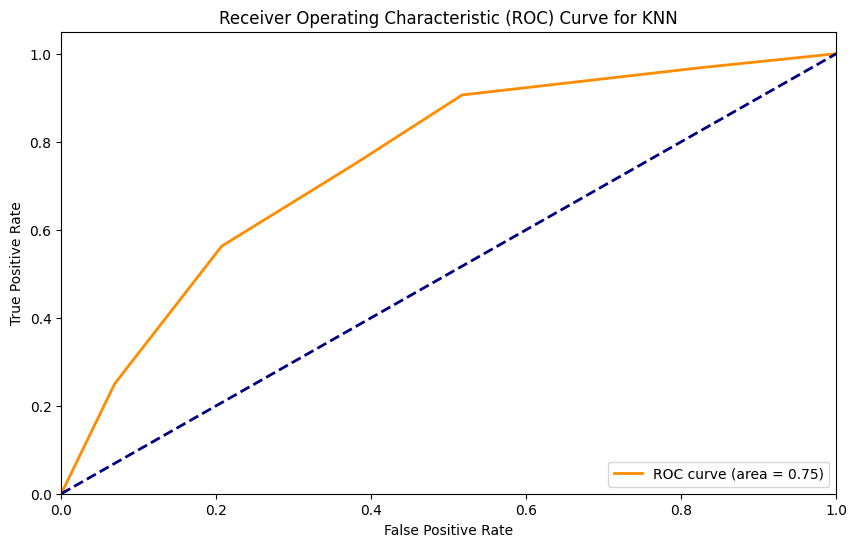

In [88]:
# ROC Curve for KNN
y_prob = knn_classifier.predict_proba(X_test)[:, 1]  # KNN can predict probabilities with predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

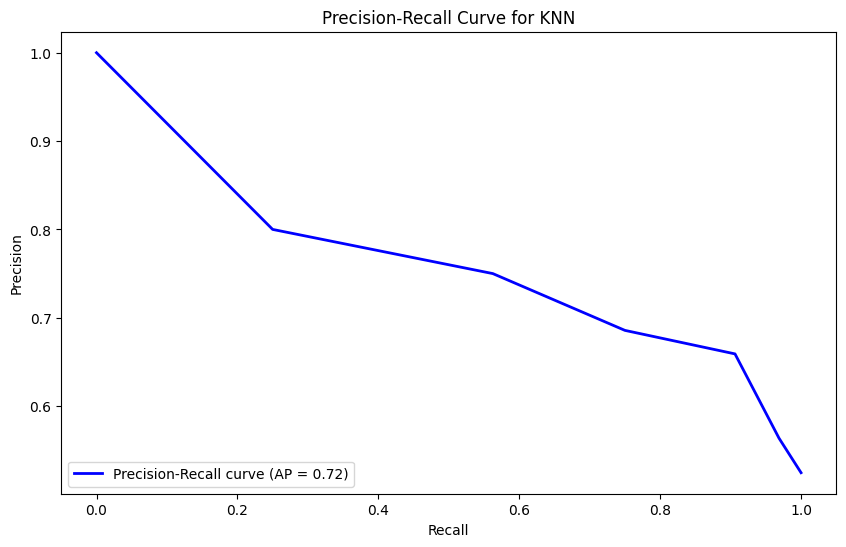

In [89]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute the predicted probabilities for the positive class (class '1' or 'Died')
y_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend(loc='lower left')
plt.show()

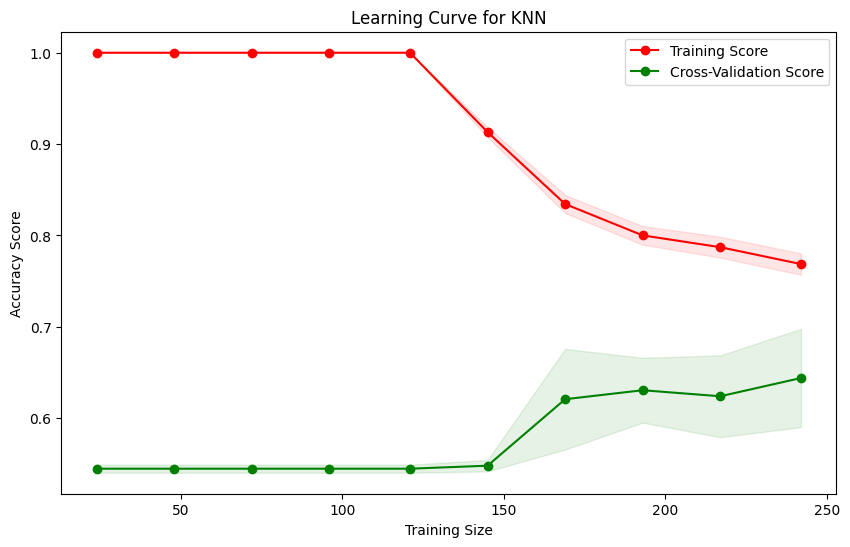

In [90]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for KNN')
plt.legend(loc='best')
plt.show()

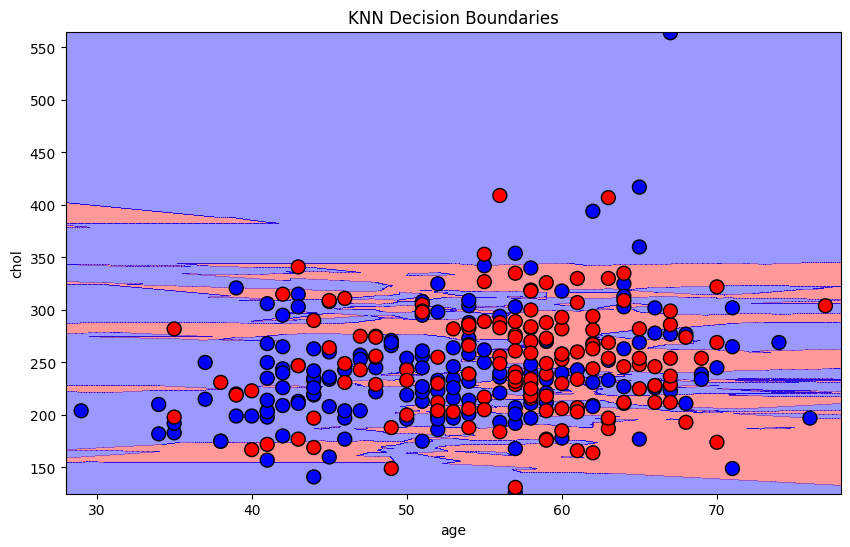

In [91]:
# Decision Boundary for K Nearest Neighbors

# Select two features for simplicity (same as before)
X_simple = X.iloc[:, [0, 3]].values # age and cholesterol
y_simple = y.values

# Train KNN on the simplified data
knn_classifier_simple = KNeighborsClassifier(n_neighbors=5)
knn_classifier_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_classifier_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age
plt.ylabel(X.columns[3]) # cholesterol
plt.title('KNN Decision Boundaries')
plt.show()

In [92]:
##################################
### Kernel Logistic Regression ###
##################################

In [93]:
# Define the kernel logistic regression class
class KernelLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, kernel='rbf', gamma=1.0, degree=3, coef0=1.0, alpha=1.0):
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.alpha = alpha

    def _kernel_function(self, X1, X2):
        if self.kernel == 'rbf':
            return rbf_kernel(X1, X2, gamma=self.gamma)
        elif self.kernel == 'poly':
            return polynomial_kernel(X1, X2, degree=self.degree, coef0=self.coef0, gamma=self.gamma)
        elif self.kernel == 'linear':
            return linear_kernel(X1, X2)
        else:
            raise ValueError('Unknown kernel')

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _log_loss(self, alpha, K, y):
        m = len(y)
        z = K.dot(alpha)
        log_loss = -np.sum(y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid(z))) / m
        reg_term = self.alpha * np.dot(alpha.T, K.dot(alpha)) / 2
        return log_loss + reg_term

    def fit(self, X, y):
        K = self._kernel_function(X, X)
        initial_alpha = np.zeros(K.shape[0])
        options = {'maxiter': 10000}
        res = minimize(self._log_loss, initial_alpha, args=(K, y), method='BFGS', options=options)
        self.alpha_ = res.x
        self.X_train_ = X
        return self  # Necessary for sklearn compatibility

    def predict_proba(self, X):
        K = self._kernel_function(X, self.X_train_)
        return self._sigmoid(K.dot(self.alpha_))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [94]:
# Train Kernel Logistic Regression model
klr_model = KernelLogisticRegression(kernel='rbf', gamma=0.01, alpha=0.1)
klr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = klr_model.predict(X_test)
y_prob = klr_model.predict_proba(X_test)

In [95]:
# Append to Model Metrics

models_metrics.append({
    'Model': 'Kernel Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, y_prob)
})

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [97]:
# Print classification report
report = classification_report(y_test, y_pred, target_names=['Not Died', 'Died'])
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

    Not Died       0.66      0.66      0.66        29
        Died       0.69      0.69      0.69        32

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



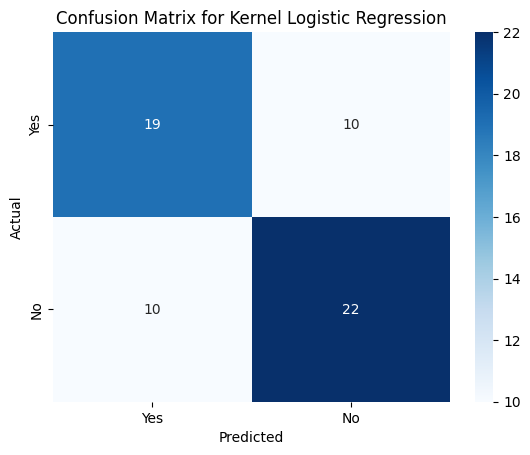

In [98]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for Kernel Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

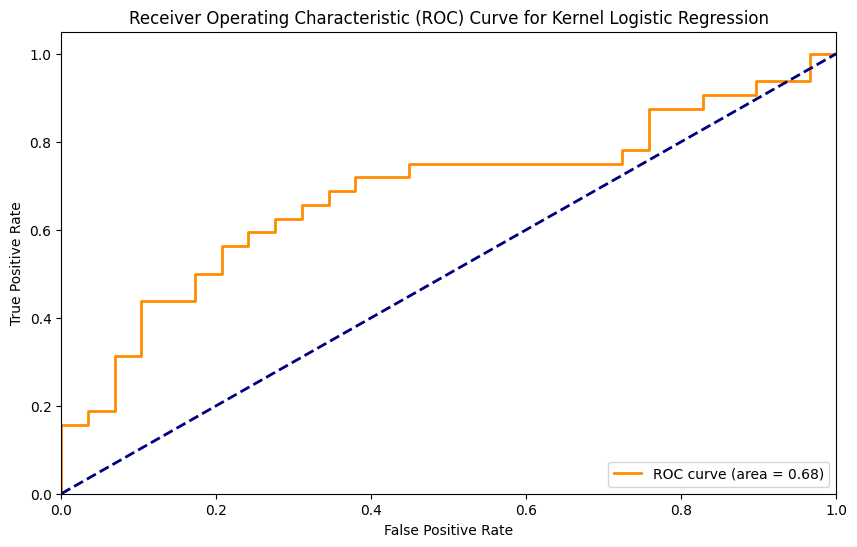

In [99]:
# ROC Curve for Kernel Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Kernel Logistic Regression')
plt.legend(loc='lower right')
plt.show()

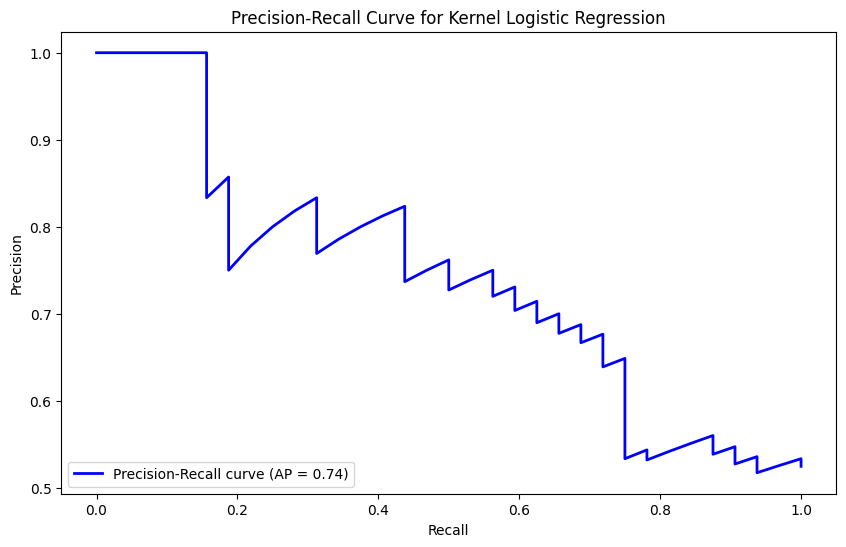

In [100]:
# Precision-Recall Curve
# Shows the trade-off between precision and recall for different threshold

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Kernel Logistic Regression')
plt.legend(loc='lower left')
plt.show()

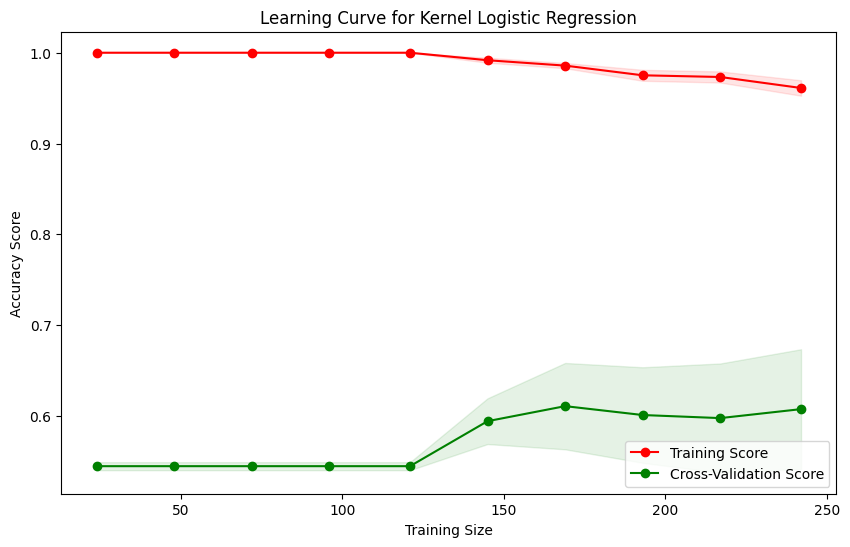

In [101]:
# Learning Curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    klr_model, X, y, cv=5, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Kernel Logistic Regression')
plt.legend(loc='best')
plt.show()

In [102]:
"""
# Decision Boundary for Kernel Logistic Regression (Takes Too Long to Generate)

# Select two features for simplicity (same as before)
X_simple = X.iloc[:, [0, 3]].values # age and cholesterol
y_simple = y.values

# Train Kernel Logistic Regression on the simplified data
klr_model_simple = KernelLogisticRegression(kernel='rbf', gamma=0.1, alpha=1.0)
klr_model_simple.fit(X_simple, y_simple)

# Plot decision boundaries
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = klr_model_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))
plt.xlabel(X.columns[0]) # age
plt.ylabel(X.columns[3]) # cholesterol
plt.title('Kernel Logistic Regression Decision Boundaries')
plt.show()
"""

"\n# Decision Boundary for Kernel Logistic Regression (Takes Too Long to Generate)\n\n# Select two features for simplicity (same as before)\nX_simple = X.iloc[:, [0, 3]].values # age and cholesterol\ny_simple = y.values\n\n# Train Kernel Logistic Regression on the simplified data\nklr_model_simple = KernelLogisticRegression(kernel='rbf', gamma=0.1, alpha=1.0)\nklr_model_simple.fit(X_simple, y_simple)\n\n# Plot decision boundaries\nx_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1\ny_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),\n                     np.arange(y_min, y_max, 0.02))\nZ = klr_model_simple.predict(np.c_[xx.ravel(), yy.ravel()])\nZ = Z.reshape(xx.shape)\n\nplt.figure(figsize=(10, 6))\nplt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))\nplt.scatter(X_simple[:, 0], X_simple[:, 1], c=y_simple, edgecolor='k', s=100, cmap=ListedColormap(('red', 'blue')))\nplt.xlabel(X.colu

In [103]:
########################
### Model Comparison ###
########################

In [104]:
# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(models_metrics)
metrics_df = metrics_df.round(3)

# Adjust the display width option
pd.set_option('display.width', 1000)

# Adjust the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(metrics_df)

                                   Model  Accuracy  Precision  Recall  F1-Score    AUC
0             Logistic Regression (Full)     0.852      0.853   0.852     0.853  0.927
1          Logistic Regression (Reduced)     0.836      0.838   0.836     0.836  0.909
2                          Decision Tree     0.738      0.750   0.738     0.736  0.742
3                            Naive Bayes     0.836      0.838   0.836     0.836  0.863
4     Linear Discriminant Analysis (LDA)     0.852      0.853   0.852     0.853  0.904
5  Quadratic Discriminant Analysis (QDA)     0.836      0.838   0.836     0.836  0.875
6           Support Vector Machine (SVM)     0.852      0.853   0.852     0.853  0.903
7              K Nearest Neighbors (KNN)     0.689      0.689   0.689     0.687  0.753
8             Kernel Logistic Regression     0.672      0.672   0.672     0.672  0.683


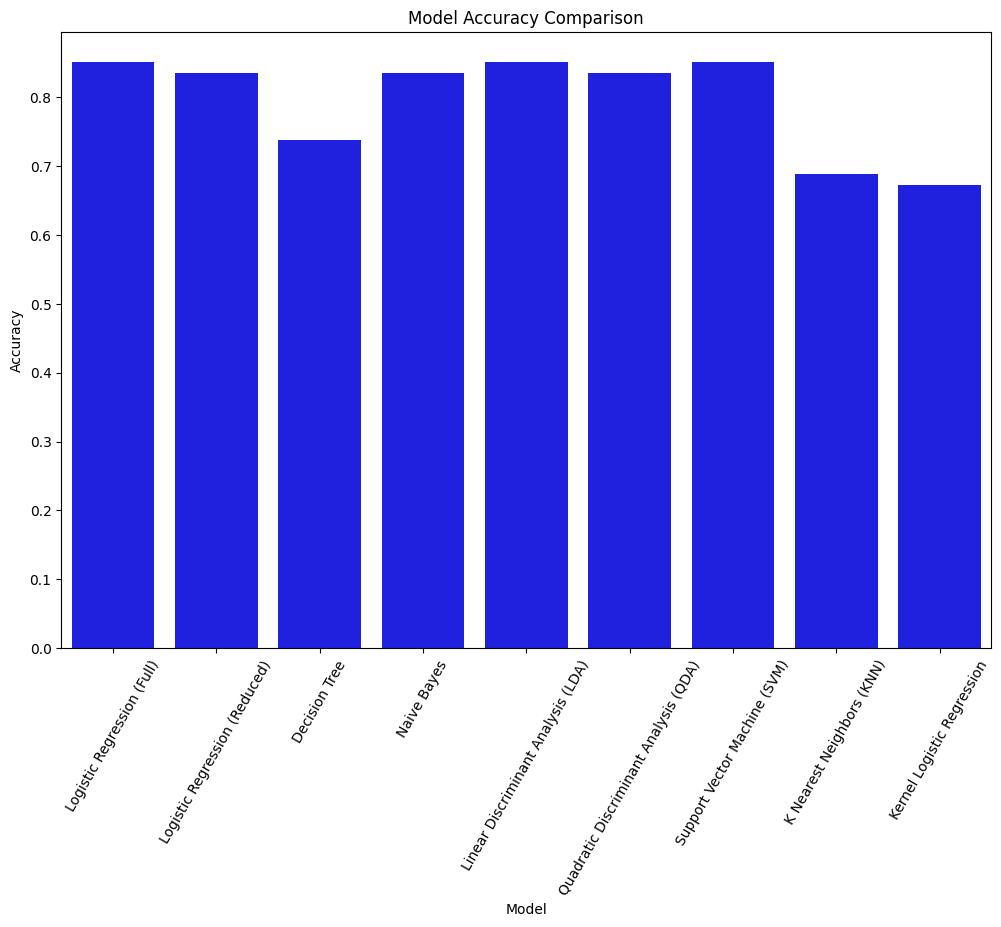

In [105]:
# Visualize the Metrics

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Accuracy of each model
sns.barplot(x='Model', y='Accuracy', data=metrics_df, color='blue')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=60)
plt.show()

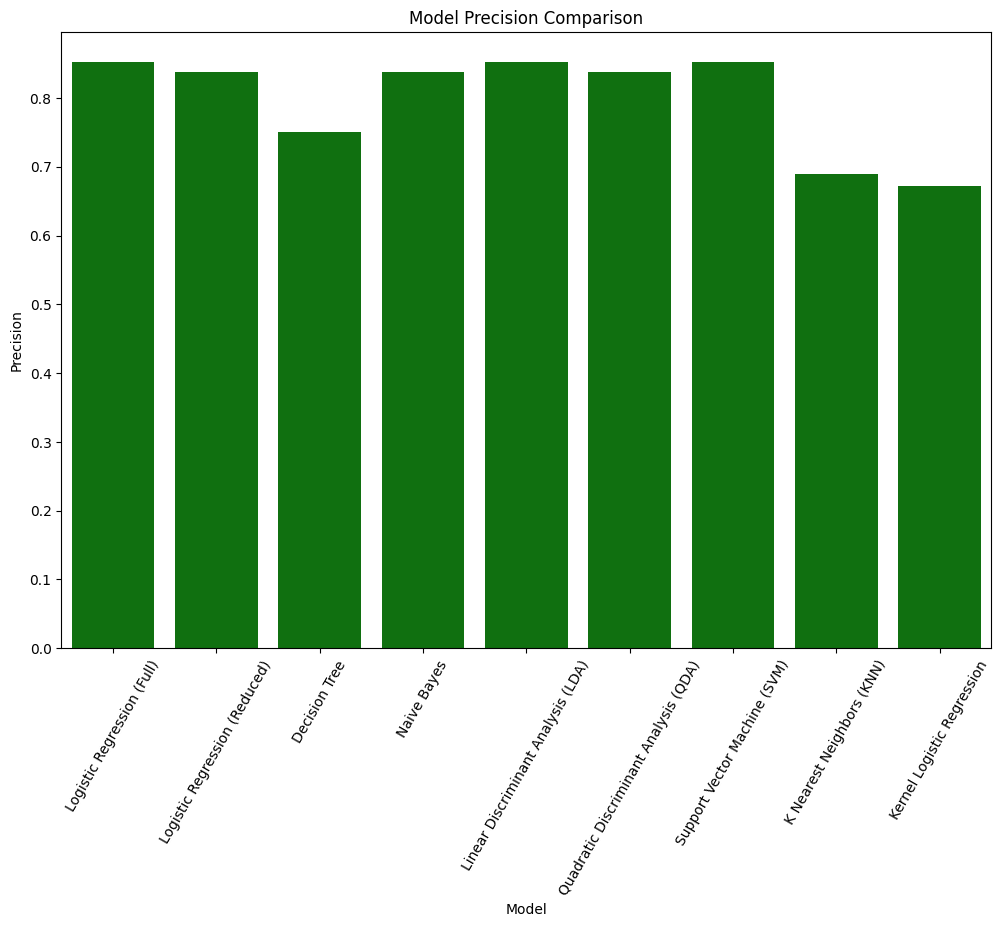

In [106]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Precision of each model
sns.barplot(x='Model', y='Precision', data=metrics_df, color='green')
plt.title('Model Precision Comparison')
plt.xticks(rotation=60)
plt.show()

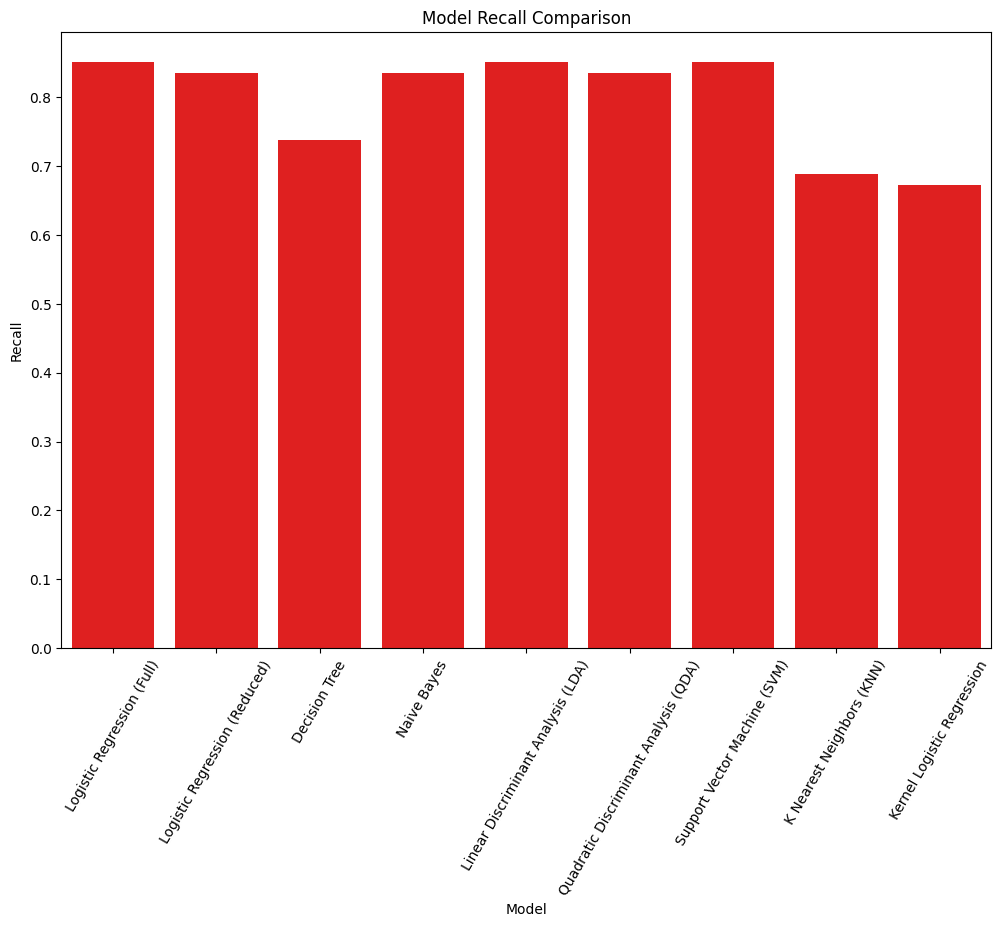

In [107]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Recall of each model
sns.barplot(x='Model', y='Recall', data=metrics_df, color='red')
plt.title('Model Recall Comparison')
plt.xticks(rotation=60)
plt.show()

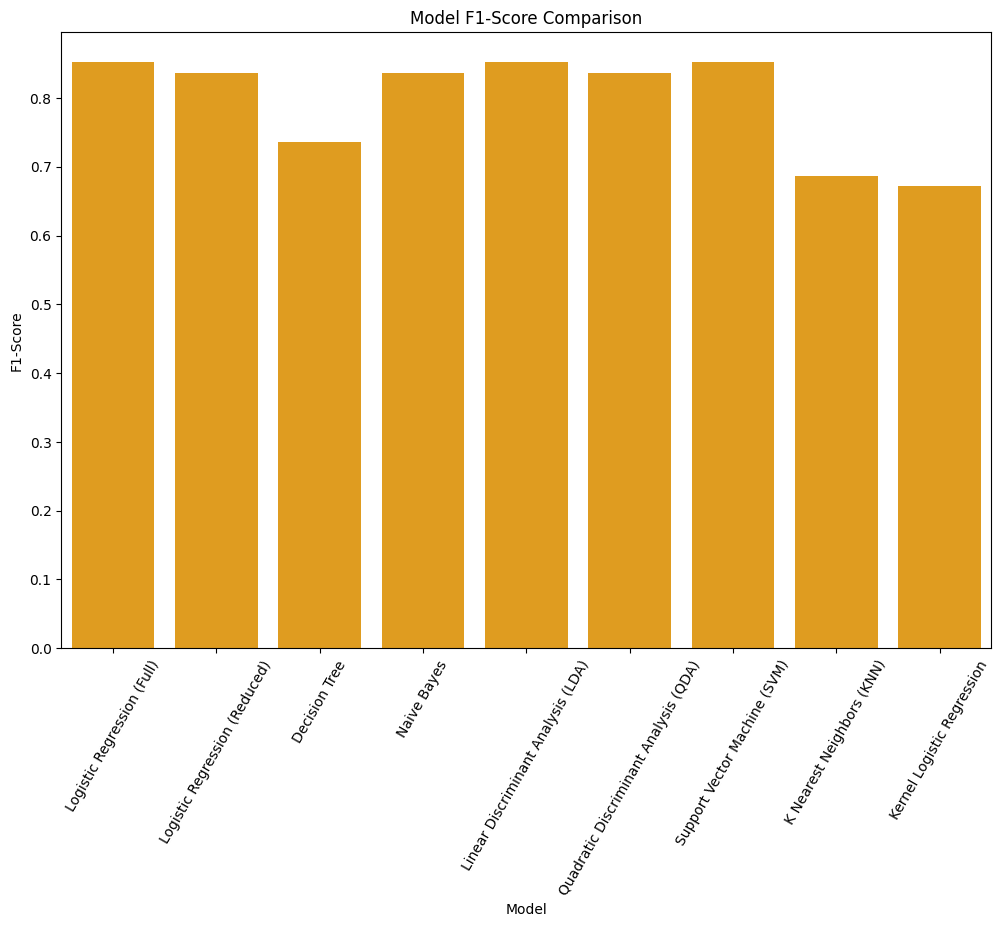

In [108]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the F1-Score of each model
sns.barplot(x='Model', y='F1-Score', data=metrics_df, color='orange')
plt.title('Model F1-Score Comparison')
plt.xticks(rotation=60)
plt.show()

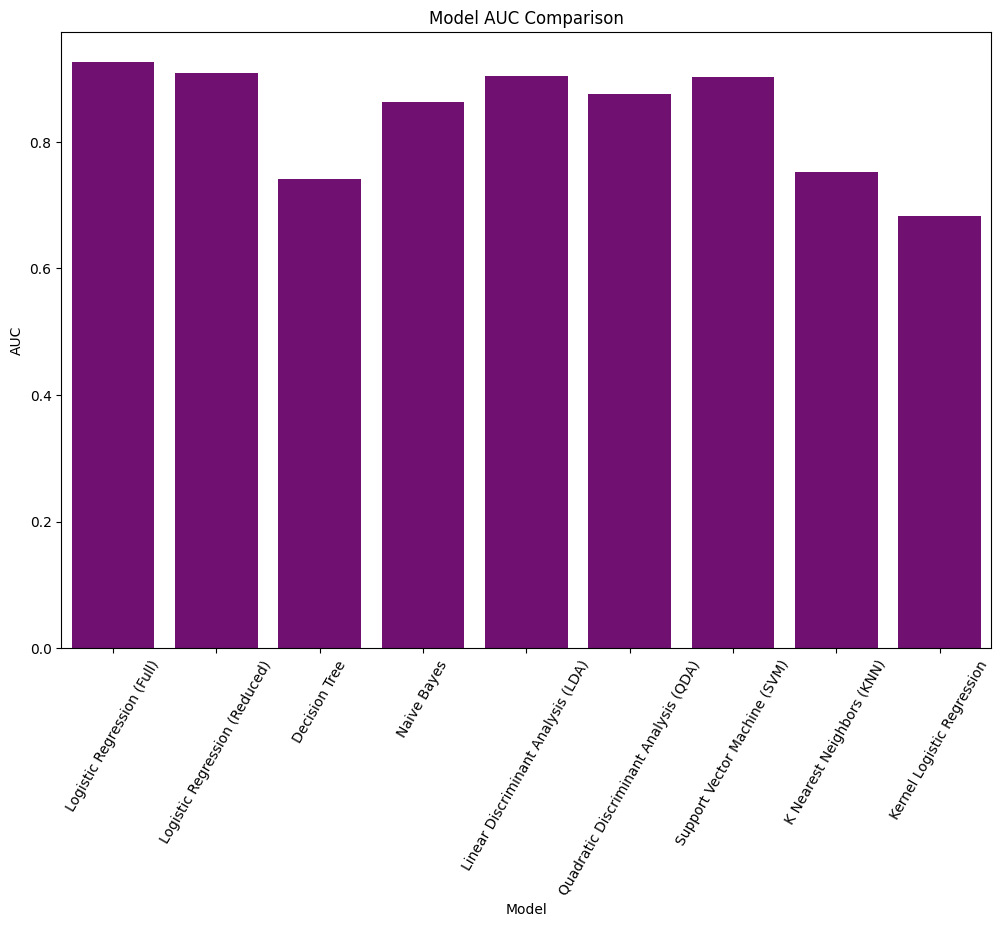

In [109]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the AUC of each model
sns.barplot(x='Model', y='AUC', data=metrics_df, color='purple')
plt.title('Model AUC Comparison')
plt.xticks(rotation=60)
plt.show()